<h1 style="font-size: 24px;">Analysis of NBA Players Since 1950</h1>

<h1 style="font-size: 24px;">By: William Huang</h1>

In this tutorial, I will be going through each step of the data science life cycle so you can better analyze data yourself. In this new era of technology, collecting, understanding, and creating models through data can give you an edge in many disciplines. Virtually all major companies use data science, either directly or indirectly to get a competitive edge in the marketplace. Understanding and being able to use data science techniques is critical to succeeding in today's world.

For this tutorial, I will be anaylzing NBA basketball data set since the 1950s to help you better understand the data science life cycle (and hopefully a bit more about basketball too).

Basketball is one of the world's most popular sports and certainly one of the most popular sports in the United States with the most prestigious league in the world, the National Basketball Association (NBA) being in America; understanding this sport more will allow you to enjoy basketball sports events and connect with basketball enthusiastic both in your professional world to build a strong relationship with peers and employers, and personal life to make new friends. 

From it's founding until now, there have been many revisions in its rulebook, shifts in strategy, and differences in physique. In this tutorial, we will try to uncover some of these trends in the NBA since the 1950s. After doing so, we will try to create a model that takes in parameters about a player to determine what era/year they played in. 

After this tutorial, you will be knowledgable about each stage of the data sciene life cycle including:

1. Data Collection
2. Data Processing
3. Exploratory analysis & Data Visualization
4. Model: Analysis, hypothesis testing, & ML
5. Interpretation: Insight & Policy Decision

I hope through this tutorial, you enjoy and learn a lot about Data Science!


<h1 style="font-size: 24px;">Data Collection</h1>

The first step of the data science life cycle is data collection. In the case of this tutorial, we will be analyzing basketball data since the 1950s, and to do that, we need basketball data. 

There are many ways to collect data, including through API calls, web-scraping, database, and even simulations. For this tutorial, we will be reading data from a dataset someone made on Kaggle (a popular website to obtain datasets) through web-scrapping techniques. For this particular tutorial, we are collecting data from https://www.kaggle.com/datasets/drgilermo/nba-players-stats. You should download the csv files from this link and drag them to your project folder so you can access them easily in the coming steps. 

Specifically, we will be using the player_data.csv file and the Seasons_Stats.csv file downloaded. For the purposes of this tutorial, to further practice all steps of the data science lifecycle like data processing, we will be omitting the Players.csv file that is also provided.

The first two very important packages in data science that we will be using for this tutorial will be NumPy and Pandas. 

NumPy is a package that is the backbone of many other datascience packages, including Pandas, and contains a bunch of methods that make it easy and efficient to do operations on lists of data. It is common convention to shorten NumPy to np when importing.

Pandas is a package that allows data to be viewed in a tabular format called DataFrames. There are many operations that can be done on the DataFrames through simple, intuitive lines of code. It is common convention to shorten Pandas to pd when importing.

You can read more about NumPy at https://numpy.org/doc/stable/user/absolute_beginners.html and Pandas at https://pandas.pydata.org/docs/user_guide/index.html#user-guide.

In [550]:
import numpy as np
import pandas as pd

# Dataframe setting that ensures that all columns of dataset are shown
pd.set_option('display.max_columns', None)

Next next two blocks of code reads the csv files and puts the data into Pandas DataFrames

In [551]:
# Data Collection, player_data

# Collect player basic information like height and weight
player_data_df = pd.read_csv("archive/player_data.csv")

player_data_df.head() 

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [552]:
# Data Collection (contd.), seasons_stats

# Collect player data for a specific season
seasons_stats_df = pd.read_csv("archive/Seasons_Stats.csv")

# Drops Unnamed: 0 column which is just the row that a person corresponds to
seasons_stats_df = seasons_stats_df.drop(columns=["Unnamed: 0"])

seasons_stats_df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,NaN,0.259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN,NaN,174.0,499.0,0.349,NaN,NaN,NaN,174.0,499.0,0.349,0.349,90.0,129.0,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,NaN,0.395,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,22.0,86.0,0.256,NaN,NaN,NaN,22.0,86.0,0.256,0.256,19.0,34.0,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,NaN,0.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN,NaN,21.0,82.0,0.256,NaN,NaN,NaN,21.0,82.0,0.256,0.256,17.0,31.0,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


Data Processing

The second step of the data science life cycle is data processing. 

Many times when you collect data, there are issues with the data. First of all, you may want to combine data so everything is properly organized. You may find that you want to condense certain information. Or maybe there is specific data that you wish to be in a different format, in which case you would use data wrangling to convert data. It could also be the case that you want the table to be organized in a cleaner way. And very importantly, you want to find a way to deal with missing data, which could be through removing invalid data or imputating data through general principals or models.

The datasets we obtained from Kaggle have many issues that require further processing that we will be fixing in the following steps.

First, we will merge the two tables that we obtained from earlier steps, merging them based on player name so we get basic info of a player in addition to a particular season's stats, all on one row.

In [553]:
# Data Processing, merge datasets

# combine the two df obtained in the earlier step
df = pd.merge(player_data_df, seasons_stats_df, left_on="name", right_on="Player")

df.head()

,name,year_start,year_end,position,height,weight,birth_date,college,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1991.0,Alaa Abdelnaby,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,NaN,0.0,0.5,0.5,0.079,NaN,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,NaN,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0
1,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1992.0,Alaa Abdelnaby,PF,23.0,POR,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,NaN,0.6,1.5,2.1,0.110,NaN,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,NaN,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0
2,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,Alaa Abdelnaby,PF,24.0,TOT,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,NaN,0.7,1.3,2.0,0.074,NaN,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0
3,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,Alaa Abdelnaby,PF,24.0,MIL,12.0,0.0,159.0,11.9,0.508,0.018,0.286,8.6,18.3,13.4,9.5,1.9,1.6,17.1,20.5,NaN,0.0,0.2,0.1,0.035,NaN,-3.7,-0.5,-4.3,-0.1,26.0,56.0,0.464,0.0,1.0,0.0,26.0,55.0,0.473,0.464,12.0,16.0,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0
4,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University,1993.0,Alaa Abdelnaby,PF,24.0,BOS,63.0,52.0,1152.0,13.4,0.557,0.000,0.240,11.3,18.1,14.8,2.2,0.8,1.2,15.4,20.5,NaN,0.7,1.2,1.9,0.079,NaN,-2.1,-2.1,-4.1,-0.6,219.0,417.0,0.525,0.0,0.0,NaN,219.0,417.0,0.525,0.525,76.0,100.0,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0


Now, we should remove columns that do not have height and weight as that is a critical part of our analysis and we do not have any reliable way to determine this information. Also, skimming through the dataset, there are not many rows with missing height and weight data so we don't have to worry about a huge bias being introduced as a result of removed rows.

We will also also be omitting the Player and position columns as that information was present on both tables that were merged so those are duplicate information. You could also omit the other pair of columns (name and Pos) that contain similar information instead to achieve the same goal of removing duplicate information.

In [554]:
# Data Processing (contd.), remove NaN (invalid) or duplicate columns

# We will discard any players without height or weight stats
df = df.dropna(subset=["height"])
df = df.dropna(subset=["weight"])

# Delete the Player and position column since these is repeated information
df = df.drop(columns=["Player", "position"])

df.head()

,name,year_start,year_end,height,weight,birth_date,college,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Alaa Abdelnaby,1991,1995,6-10,240.0,"June 24, 1968",Duke University,1991.0,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,NaN,0.0,0.5,0.5,0.079,NaN,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,NaN,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0
1,Alaa Abdelnaby,1991,1995,6-10,240.0,"June 24, 1968",Duke University,1992.0,PF,23.0,POR,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,NaN,0.6,1.5,2.1,0.110,NaN,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,NaN,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0
2,Alaa Abdelnaby,1991,1995,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,TOT,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,NaN,0.7,1.3,2.0,0.074,NaN,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0
3,Alaa Abdelnaby,1991,1995,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,MIL,12.0,0.0,159.0,11.9,0.508,0.018,0.286,8.6,18.3,13.4,9.5,1.9,1.6,17.1,20.5,NaN,0.0,0.2,0.1,0.035,NaN,-3.7,-0.5,-4.3,-0.1,26.0,56.0,0.464,0.0,1.0,0.0,26.0,55.0,0.473,0.464,12.0,16.0,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0
4,Alaa Abdelnaby,1991,1995,6-10,240.0,"June 24, 1968",Duke University,1993.0,PF,24.0,BOS,63.0,52.0,1152.0,13.4,0.557,0.000,0.240,11.3,18.1,14.8,2.2,0.8,1.2,15.4,20.5,NaN,0.7,1.2,1.9,0.079,NaN,-2.1,-2.1,-4.1,-0.6,219.0,417.0,0.525,0.0,0.0,NaN,219.0,417.0,0.525,0.525,76.0,100.0,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0


We now want to convert the height and weight to an appropriate format, practicing our awesome data wrangling skills! In the original data, we have the height in terms of feet and inches, in which there is a - symbol to seperate feet and inches. This is a huge inconvienience that we should remedy because this is a string instead of a number, so the computer cannot easily establish a relationship between different heights. I fixed this by extracting the feet and inches values and converted that to centimeters. 

I also converted the weight in this code snippet. This was not totally necessary since everything was in a numeric format in this row, however, I figured it would be better to convert it to the metric system in kg as opposed to its original value in pounds. This is make the data better fit the "language of science."

You can read more about height conversion here: https://www.wikihow.com/Convert-Inches-to-Centimeters
You can read more about weight conversion here: https://www.wikihow.com/Convert-Pounds-to-Kilograms

For both height and weight, I divided players in categories so analysis would be more smooth when considering small deviations in height and weight as negligable.

Lastly, I determined how many years a certain player played based off the given year_start and year_end columns.

In [555]:
# Data Processing (contd.), reformat height to cm and weight in kg and add career length column

# extract the feet and inches with index 0 being feet and inches being index inches
height_info = df['height'].str.extract(r'(\d+)-(\d+)').astype(int)

# turn height from inches to centimeters (cm)
df['height'] = round((height_info[0] * 12 + height_info[1]) * 2.54)

# This adds a new column to the DataFrame that categorizes which height class someone is in
df["height_class"] = pd.cut(df["height"],  bins = 10, 
                                     right = False, labels = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10"])

# turn weight from pounds to kilogram (kg)
df["weight"] = round(df["weight"] * 0.454)

# This adds a new column to the DataFrame that categorizes which weight class someone is in
df["weight_class"] = pd.cut(df["weight"],  bins = 10, 
                                     right = False, labels = ["c1", "c2", "c3", "c4", "c5", "c6", "c7", "c8", "c9", "c10"])

# add years_played column
df["years_played"] = df["year_end"] - df["year_start"] + 1

df.head()

,name,year_start,year_end,height,weight,birth_date,college,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height_class,weight_class,years_played
0,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1991.0,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,NaN,0.0,0.5,0.5,0.079,NaN,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,NaN,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,c7,c5,5
1,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1992.0,PF,23.0,POR,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,NaN,0.6,1.5,2.1,0.110,NaN,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,NaN,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,c7,c5,5
2,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,TOT,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,NaN,0.7,1.3,2.0,0.074,NaN,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,c7,c5,5
3,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,MIL,12.0,0.0,159.0,11.9,0.508,0.018,0.286,8.6,18.3,13.4,9.5,1.9,1.6,17.1,20.5,NaN,0.0,0.2,0.1,0.035,NaN,-3.7,-0.5,-4.3,-0.1,26.0,56.0,0.464,0.0,1.0,0.0,26.0,55.0,0.473,0.464,12.0,16.0,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0,c7,c5,5
4,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,BOS,63.0,52.0,1152.0,13.4,0.557,0.000,0.240,11.3,18.1,14.8,2.2,0.8,1.2,15.4,20.5,NaN,0.7,1.2,1.9,0.079,NaN,-2.1,-2.1,-4.1,-0.6,219.0,417.0,0.525,0.0,0.0,NaN,219.0,417.0,0.525,0.525,76.0,100.0,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0,c7,c5,5


In the following code snippet, I filled in several empty values (NaN). 

First, I filled all college empty values as the string High School; those who didn't have anything filled for college are those who didn't go to college, with High School probably being their highest education. Afterwards, I changed the college column name to highest_education so it better represented the span of data possible in that column. 

As for the 3 point related columns that had empty rows, I filled them with 0 because I realized that they were missing because the line didn't exist yet. This is one of the most signifcant ways Basketball has changed over different eras. You can read more about that here: https://www.nba.com/news/this-day-in-history-oct-12-the-first-3-point-field-goal. 

In [556]:
# Data Processing (contd.), filling in NaN values

# replace NaN (empty values) for college with High School
df["college"] = df["college"].fillna("High School")

# rename college to highest education to better reflect the possible data contained
df = df.rename(columns={"college": "highest_education"})

# Let 3 point stats equal to zero if empty because that was when 3 point line was not added yet
df["3PAr"] = df["3PAr"].fillna(0)
df["3P"] = df["3P"].fillna(0)
df["3PA"] = df["3PA"].fillna(0)
df["3P%"] = df["3P%"].fillna(0)

df.head()

,name,year_start,year_end,height,weight,birth_date,highest_education,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height_class,weight_class,years_played
0,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1991.0,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,NaN,0.0,0.5,0.5,0.079,NaN,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.0,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,c7,c5,5
1,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1992.0,PF,23.0,POR,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,NaN,0.6,1.5,2.1,0.110,NaN,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.0,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,c7,c5,5
2,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,TOT,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,NaN,0.7,1.3,2.0,0.074,NaN,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,c7,c5,5
3,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,MIL,12.0,0.0,159.0,11.9,0.508,0.018,0.286,8.6,18.3,13.4,9.5,1.9,1.6,17.1,20.5,NaN,0.0,0.2,0.1,0.035,NaN,-3.7,-0.5,-4.3,-0.1,26.0,56.0,0.464,0.0,1.0,0.0,26.0,55.0,0.473,0.464,12.0,16.0,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0,c7,c5,5
4,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,BOS,63.0,52.0,1152.0,13.4,0.557,0.000,0.240,11.3,18.1,14.8,2.2,0.8,1.2,15.4,20.5,NaN,0.7,1.2,1.9,0.079,NaN,-2.1,-2.1,-4.1,-0.6,219.0,417.0,0.525,0.0,0.0,0.0,219.0,417.0,0.525,0.525,76.0,100.0,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0,c7,c5,5


Additional problems are that assist, steals, and blocks weren't recorded for earlier years.

We can use data imputation to fix this by creating a model with games (G), height, weight, and years_played, as I speculate all these parameters have a relation to the mentioned stats. We will use a Linear Regression model with these feature values to predict missing values.

* Note: Our model's accuracy is not guaranteed our even claimed to be accurate. For the purposes of this tutorial, I am just demonstrating ways unknown data could be dealt with.

sklearn is an important machine learning package commonly used in data science. We will also be using this package in future steps in the tutorial besides for data imputation. 

In [557]:
# package so we can calculate linear regression
from sklearn.linear_model import LinearRegression

There are many ways to solve the current dilemma that I have right now. In this tutorial, I am imputing data by predicting assists, blocks, steals per game and then finding total assists, blocks, and steals per season through the per game data. I did this because I wanted more emphasis/accuracy for per game data as that is the main data that I use in future steps of this tutorial.

Because I need to build a model off existing data, I removed rows that did not have assists, blocks, and steals data. Afterward, because per game data was not given, I calculated per game data by diving the total for a given stat by the number of games played for the respective season. Then I just created a linear model based off the height, weight, games (G), and years_played features to predict each of the per game data. 

In [558]:
# Data Processing (contd.), fill in missing AST, STL, and BLK

# Build model off only existing data
cleaned_df = df.dropna(subset=["AST","BLK", "STL"], inplace=False).copy()

# We need to calculate the average points made per game since this is not given to us
cleaned_df.loc[:,"PPG"] = cleaned_df["PTS"] / cleaned_df["G"]

# Round PPG to two decimal points
cleaned_df.loc[:,"PPG"] = cleaned_df["PPG"].round(decimals=2)

#####

# We need to calculate the average assists made per game since this is not given to us
cleaned_df.loc[:,"ASTPG"] = cleaned_df["AST"] / cleaned_df["G"]

# Round PPG to two decimal points
cleaned_df.loc[:,"ASTPG"] = cleaned_df["ASTPG"].round(decimals=2)

#####

# We need to calculate the average steals made per game since this is not given to us
cleaned_df.loc[:,"STLPG"] = cleaned_df["STL"] / cleaned_df["G"]

# Round STL to two decimal points
cleaned_df.loc[:,"STLPG"] = cleaned_df["STLPG"].round(decimals=2)

#####

# We need to calculate the average blocks made per game since this is not given to us
cleaned_df.loc[:,"BLKPG"] = cleaned_df["BLK"] / cleaned_df["G"]

# Round BLK to two decimal points
cleaned_df.loc[:,"BLKPG"] = cleaned_df["BLKPG"].round(decimals=2)

######

# Assist model
astpg_reg = LinearRegression().fit(cleaned_df[["height", "weight", "G", "years_played"]], cleaned_df["ASTPG"])

# Steal model
stlpg_reg = LinearRegression().fit(cleaned_df[["height", "weight", "G", "years_played"]], cleaned_df["STLPG"])

# Block model
blkpg_reg = LinearRegression().fit(cleaned_df[["height", "weight", "G", "years_played"]], cleaned_df["BLKPG"])

After creating the models from the previous step, I used that model to predict missing values in original Dataframe.

In [559]:
# Don't want to over-estimate per game data so I clipped values to a max. A min of 0 was provided just in case the model
# gave a negative number for a stat, which is impossible
assistspg_prediction = np.clip(astpg_reg.predict(df[["height", "weight", "G", "years_played"]]), 0, cleaned_df["ASTPG"].max())
stealspg_prediction = np.clip(stlpg_reg.predict(df[["height", "weight", "G", "years_played"]]), 0, cleaned_df["STLPG"].max())
blockspg_prediction = np.clip(blkpg_reg.predict(df[["height", "weight", "G", "years_played"]]), 0, cleaned_df["BLKPG"].max())

df["NEW_ASTPG"] = pd.Series(assistspg_prediction)
df["NEW_STLPG"] = pd.Series(stealspg_prediction)
df["NEW_BLKPG"] = pd.Series(blockspg_prediction)

# Fill missing values
df["AST"].fillna(df["NEW_ASTPG"] * df["G"], inplace=True)
df["STL"].fillna(df["NEW_STLPG"] * df["G"], inplace=True)
df["BLK"].fillna(df["NEW_BLKPG"] * df["G"], inplace=True)

df["AST"].fillna(0, inplace=True)
df["STL"].fillna(0, inplace=True)
df["BLK"].fillna(0, inplace=True)

df.head()

,name,year_start,year_end,height,weight,birth_date,highest_education,Year,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,height_class,weight_class,years_played,NEW_ASTPG,NEW_STLPG,NEW_BLKPG
0,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1991.0,PF,22.0,POR,43.0,0.0,290.0,13.1,0.499,0.000,0.379,10.4,23.4,17.0,5.8,0.7,2.5,14.0,22.1,NaN,0.0,0.5,0.5,0.079,NaN,-4.2,-0.7,-5.0,-0.2,55.0,116.0,0.474,0.0,0.0,0.0,55.0,116.0,0.474,0.474,25.0,44.0,0.568,27.0,62.0,89.0,12.0,4.0,12.0,22.0,39.0,135.0,c7,c5,5,0.500200,0.375820,0.495336
1,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1992.0,PF,23.0,POR,71.0,1.0,934.0,13.5,0.533,0.000,0.280,9.5,20.9,15.2,4.7,1.3,1.1,14.0,20.6,NaN,0.6,1.5,2.1,0.110,NaN,-3.0,-0.9,-3.9,-0.5,178.0,361.0,0.493,0.0,0.0,0.0,178.0,361.0,0.493,0.493,76.0,101.0,0.752,81.0,179.0,260.0,30.0,25.0,16.0,66.0,132.0,432.0,c7,c5,5,1.046392,0.570658,0.619714
2,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,TOT,75.0,52.0,1311.0,13.2,0.551,0.002,0.245,11.0,18.1,14.6,3.0,1.0,1.2,15.6,20.5,NaN,0.7,1.3,2.0,0.074,NaN,-2.3,-1.9,-4.2,-0.7,245.0,473.0,0.518,0.0,1.0,0.0,245.0,472.0,0.519,0.518,88.0,116.0,0.759,126.0,211.0,337.0,27.0,25.0,26.0,97.0,189.0,578.0,c7,c5,5,1.124420,0.598492,0.637482
3,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,MIL,12.0,0.0,159.0,11.9,0.508,0.018,0.286,8.6,18.3,13.4,9.5,1.9,1.6,17.1,20.5,NaN,0.0,0.2,0.1,0.035,NaN,-3.7,-0.5,-4.3,-0.1,26.0,56.0,0.464,0.0,1.0,0.0,26.0,55.0,0.473,0.464,12.0,16.0,0.750,12.0,25.0,37.0,10.0,6.0,4.0,13.0,24.0,64.0,c7,c5,5,0.000000,0.160106,0.357632
4,Alaa Abdelnaby,1991,1995,208.0,109.0,"June 24, 1968",Duke University,1993.0,PF,24.0,BOS,63.0,52.0,1152.0,13.4,0.557,0.000,0.240,11.3,18.1,14.8,2.2,0.8,1.2,15.4,20.5,NaN,0.7,1.2,1.9,0.079,NaN,-2.1,-2.1,-4.1,-0.6,219.0,417.0,0.525,0.0,0.0,0.0,219.0,417.0,0.525,0.525,76.0,100.0,0.760,114.0,186.0,300.0,17.0,19.0,22.0,84.0,165.0,514.0,c7,c5,5,0.890337,0.514990,0.584177


This coding portion calculates per game data for original DataFrame and then removes all other columns that have empty values, which we were not planning to use for this tutorial anyways.

In [560]:
# Data Processing (contd.), calculate new column based off another column so we can 
# stats based off number of games

# We need to calculate the average points made per game since this is not given to us
df["PPG"] = df["PTS"] / df["G"]

# Round PPG to two decimal points
df["PPG"] = df["PPG"].round(decimals=2)

#####

# We need to calculate the average assists made per game since this is not given to us
df["ASTPG"] = df["AST"] / df["G"]

# Round PPG to two decimal points
df["ASTPG"] = df["ASTPG"].round(decimals=2)

#####

# We need to calculate the average steals made per game since this is not given to us
df["STLPG"] = df["STL"] / df["G"]

# Round STL to two decimal points
df["STLPG"] = df["STLPG"].round(decimals=2)

#####

# We need to calculate the average blocks made per game since this is not given to us
df["BLKPG"] = df["BLK"] / df["G"]

# Round BLK to two decimal points
df["BLKPG"] = df["BLKPG"].round(decimals=2)

# Drop unneeded columns
df.dropna(axis=1, inplace=True)

df.head()

,name,year_start,year_end,height,weight,highest_education,Year,Pos,Tm,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,height_class,weight_class,years_played,PPG,ASTPG,STLPG,BLKPG
0,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1991.0,PF,POR,43.0,0.000,55.0,116.0,0.0,0.0,0.0,55.0,116.0,25.0,44.0,12.0,4.0,12.0,39.0,135.0,c7,c5,5,3.14,0.28,0.09,0.28
1,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1992.0,PF,POR,71.0,0.000,178.0,361.0,0.0,0.0,0.0,178.0,361.0,76.0,101.0,30.0,25.0,16.0,132.0,432.0,c7,c5,5,6.08,0.42,0.35,0.23
2,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,TOT,75.0,0.002,245.0,473.0,0.0,1.0,0.0,245.0,472.0,88.0,116.0,27.0,25.0,26.0,189.0,578.0,c7,c5,5,7.71,0.36,0.33,0.35
3,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,MIL,12.0,0.018,26.0,56.0,0.0,1.0,0.0,26.0,55.0,12.0,16.0,10.0,6.0,4.0,24.0,64.0,c7,c5,5,5.33,0.83,0.50,0.33
4,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,BOS,63.0,0.000,219.0,417.0,0.0,0.0,0.0,219.0,417.0,76.0,100.0,17.0,19.0,22.0,165.0,514.0,c7,c5,5,8.16,0.27,0.30,0.35


Finally we are done data processing for our dataset. This can be a very tedious process, but doing this step well is necessary to properly understand and use your data.

Exploratory analysis & Data Visualization

We know have all the data we need and we have it all processed to be used for analysis. This third step will allow you to understand and establish patterns and trends in the data you have collected and processed.

The following packages listed below are very important for data analysis and visualization. matplotlib.pyplot (shortened to plt by convention) will be extensively used in this step for various scatter and line plots and the seaborn package (shortened to sns) will be extensively used for regressions plots and violin plots (plot that shows distribution of points for a given independent variable value). 

You can read more about matplotlib here: https://matplotlib.org/
You can read more about seaborn here: https://seaborn.pydata.org/

In [561]:
# Import packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

Here, we created a new Dataframe that groups together names and highests education and takes the mean of the rows that corresponds to those categories

In [562]:
# Exploratory analysis & Data Visualization

# Determine averages for entire careers
group1_df = df.groupby(["name", "highest_education"]).mean(numeric_only=True)

group1_df.head()


,,year_start,year_end,height,weight,Year,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,years_played,PPG,ASTPG,STLPG,BLKPG
name,highest_education,,,,,,,,,,,,,,,,,,,,,,,,,,
A.C. Green,Oregon State University,1986.0,2001.0,206.0,100.0,1993.888889,75.611111,0.049,265.444444,538.111111,6.944444,28.277778,0.146833,258.5,509.833333,180.388889,247.055556,81.611111,61.277778,31.222222,143.388889,718.222222,16.0,9.233889,1.048333,0.802222,0.392778
A.J. Bramlett,University of Arizona,2000.0,2000.0,208.0,103.0,2000.000000,8.000000,0.000,4.000000,21.000000,0.000000,0.000000,0.000000,4.0,21.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,8.000000,1.0,1.000000,0.000000,0.120000,0.000000
A.J. English,Virginia Union University,1991.0,1992.0,190.0,79.0,1991.500000,75.500000,0.047,308.500000,709.000000,4.500000,32.500000,0.136500,304.0,676.500000,129.500000,166.500000,160.000000,28.500000,12.000000,143.500000,751.000000,2.0,9.870000,2.150000,0.380000,0.160000
A.J. Guyton,Indiana University,2001.0,2003.0,185.0,82.0,2002.000000,26.666667,0.371,55.333333,146.666667,24.333333,64.333333,0.255000,31.0,82.333333,12.333333,15.000000,49.000000,6.666667,4.000000,19.333333,147.333333,3.0,3.806667,1.580000,0.330000,0.103333
A.J. Hammons,Purdue University,2017.0,2017.0,213.0,118.0,2017.000000,22.000000,0.238,17.000000,42.000000,5.000000,10.000000,0.500000,12.0,32.000000,9.000000,20.000000,4.000000,1.000000,13.000000,21.000000,48.000000,1.0,2.180000,0.180000,0.050000,0.590000


Here, we created a new Dataframe that groups together height_class and weight_class and take the max of the row values. This will be useful when analyzing the best players in the league.

In [563]:
# Get stats for the best players for a given height or weight
height_max_df = df.groupby(["height_class"]).max(numeric_only=True)

weight_max_df = df.groupby(["weight_class"]).max(numeric_only=True)

This is code to analyze PPG based off height and weight

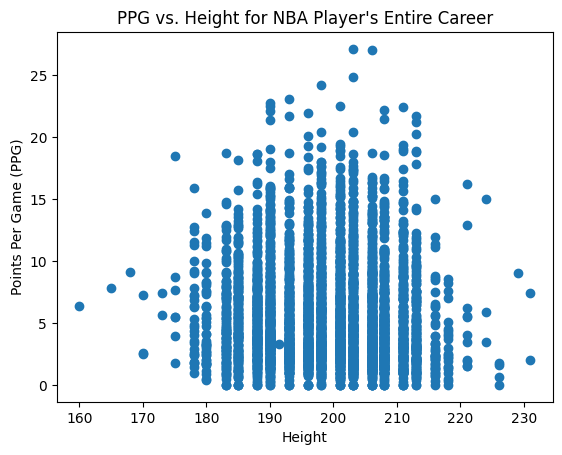

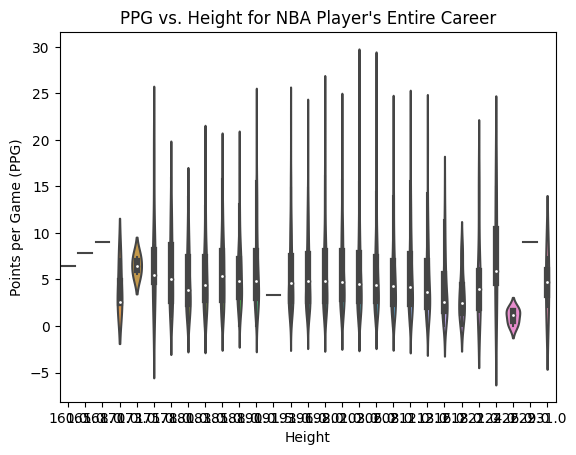

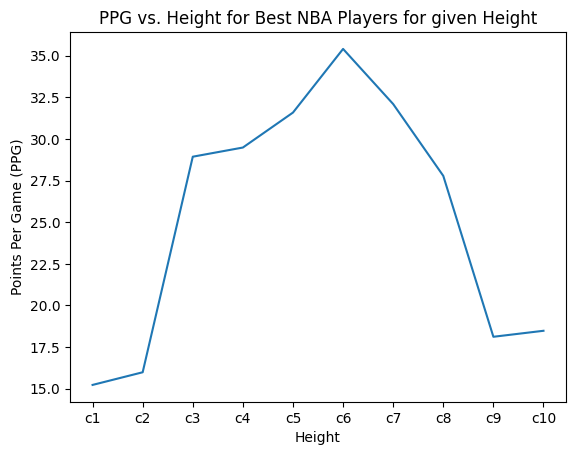

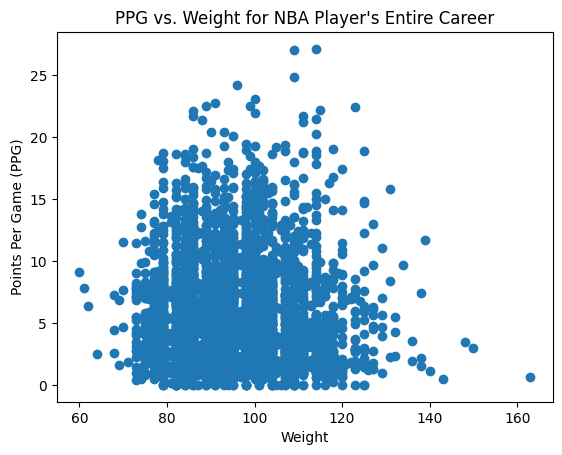

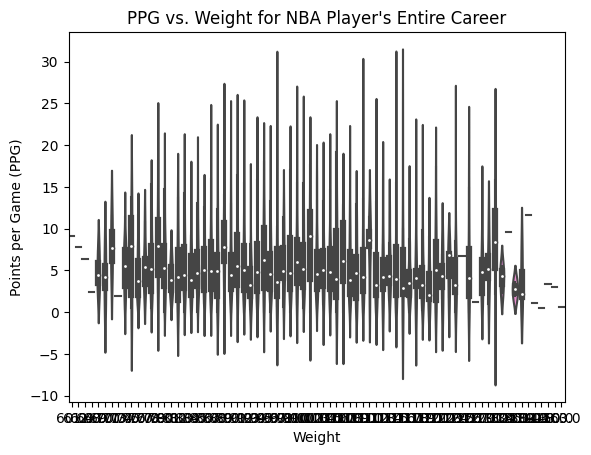

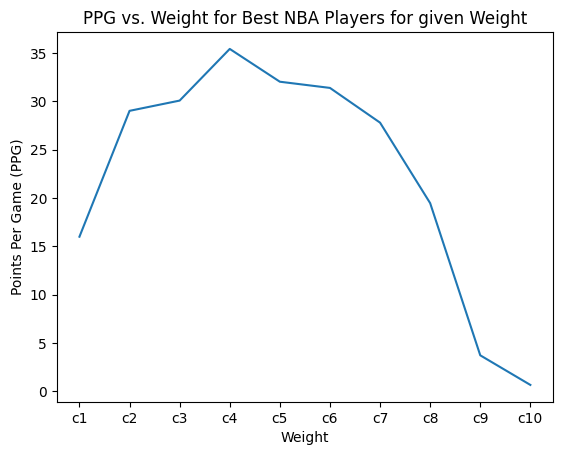

In [564]:
# Plot PPG vs. Height
plt.scatter(group1_df["height"], group1_df["PPG"])

#  Create Labels
plt.title("PPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Points Per Game (PPG)")

plt.show()

# Plot PPG vs. Height
sns.violinplot(data=group1_df, x="height", y="PPG")

#  Create Labels
plt.title("PPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Points per Game (PPG)")

plt.show()

plt.plot(height_max_df.index, height_max_df["PPG"])

#  Create Labels
plt.title("PPG vs. Height for Best NBA Players for given Height")
plt.xlabel("Height")
plt.ylabel("Points Per Game (PPG)")

plt.show()

####

# Plot PPG vs. Weight
plt.scatter(group1_df["weight"], group1_df["PPG"])

#  Create Labels
plt.title("PPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Points Per Game (PPG)")

plt.show()

# Plot PPG vs. Weight
sns.violinplot(data=group1_df, x="weight", y="PPG")

#  Create Labels
plt.title("PPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Points per Game (PPG)")

plt.show()

# Plot PPG vs. Weight
plt.plot(weight_max_df.index, weight_max_df["PPG"])

#  Create Labels
plt.title("PPG vs. Weight for Best NBA Players for given Weight")
plt.xlabel("Weight")
plt.ylabel("Points Per Game (PPG)")

plt.show()

With the violin plots, you can see that for the average player, PPG does not necessarily vary much as height or weight changes. As we analyze the best players, we can see that height and weight do matter, with the results representing a bell-shaped curved. This is intuitively true as heavier players are generally taller and height is an advantage in basketball. However, at some point, height limits ones ability to be highly athletic, such as in the case of Manute Bol, one of the NBA's tallest to ever play the game (https://www.basketball-reference.com/players/b/bolma01.html). Excessive weight (not from muscle mass) is likely to worsen one's athletic abilities too.

Analysis for ASTPG based off height and weight

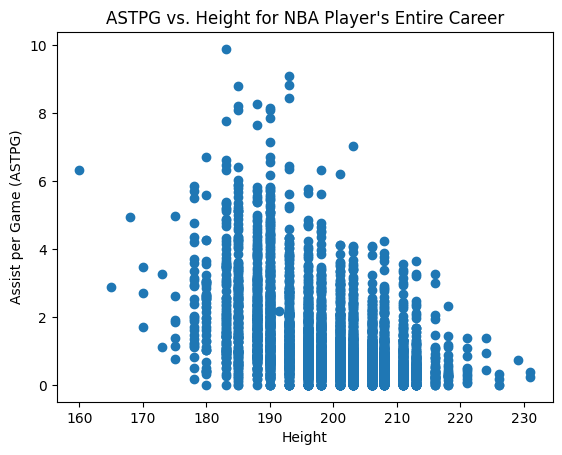

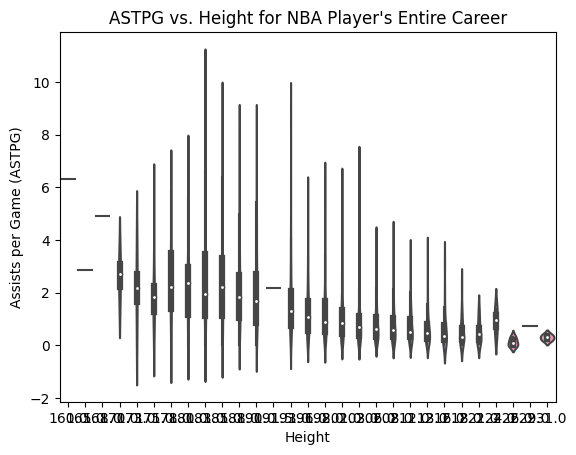

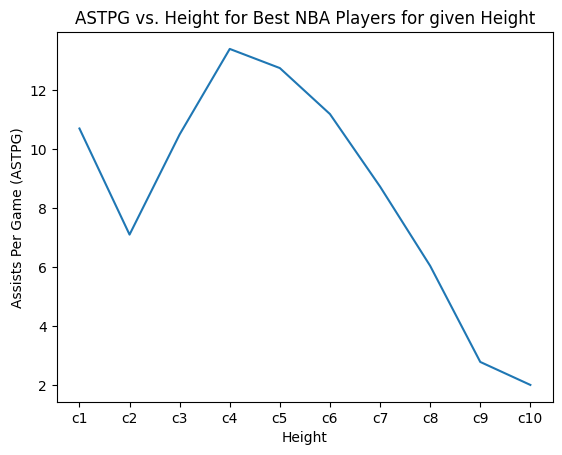

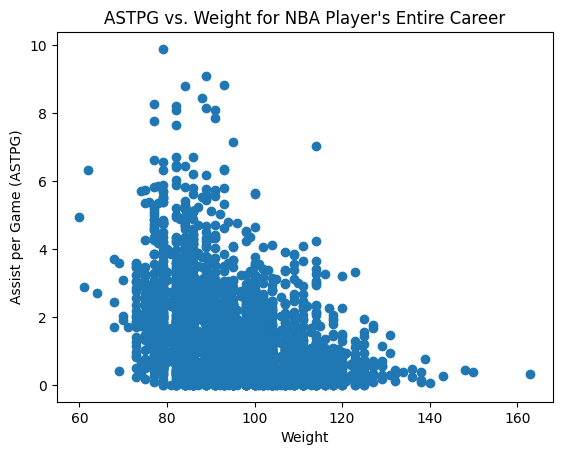

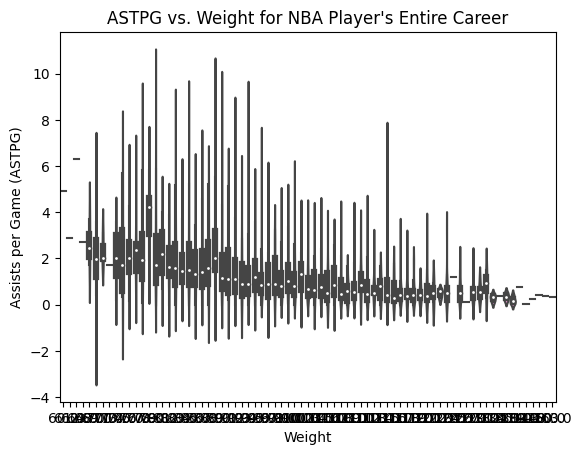

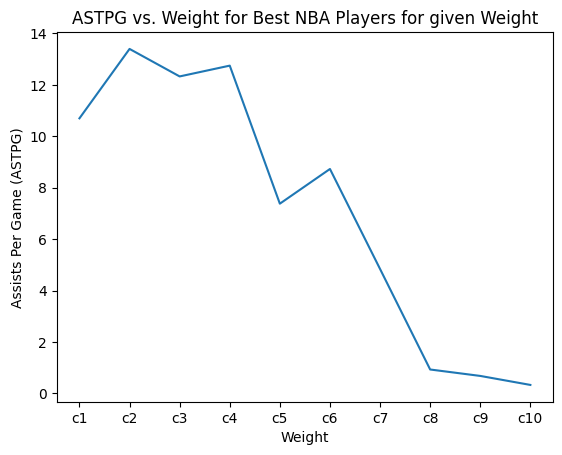

In [565]:
# Plot ASTPG vs. height
plt.scatter(group1_df["height"], group1_df["ASTPG"])

#  Create Labels
plt.title("ASTPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Assist per Game (ASTPG)")

plt.show()

# Plot ASTPG vs. Height
sns.violinplot(data=group1_df, x="height", y="ASTPG")

#  Create Labels
plt.title("ASTPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Assists per Game (ASTPG)")

plt.show()

# Plot ASTPG vs. Height
plt.plot(height_max_df.index, height_max_df["ASTPG"])

#  Create Labels
plt.title("ASTPG vs. Height for Best NBA Players for given Height")
plt.xlabel("Height")
plt.ylabel("Assists Per Game (ASTPG)")

plt.show()

####

# Plot ASTPG vs. Weight
plt.scatter(group1_df["weight"], group1_df["ASTPG"])

#  Create Labels
plt.title("ASTPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Assist per Game (ASTPG)")

plt.show()

# Plot ASTPG vs. Weight
sns.violinplot(data=group1_df, x="weight", y="ASTPG")

#  Create Labels
plt.title("ASTPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Assists per Game (ASTPG)")

plt.show()

# Plot ASTPG vs. Weight
plt.plot(weight_max_df.index, weight_max_df["ASTPG"])

#  Create Labels
plt.title("ASTPG vs. Weight for Best NBA Players for given Weight")
plt.xlabel("Weight")
plt.ylabel("Assists Per Game (ASTPG)")

plt.show()

In general, for both the average and top players, the shorter (and likely lighter) players have more assists, likely because those players are often relegated to the point guard role, who's job is to distribute the ball and make their teammates better.

You can read more about basketball positions here: https://en.wikipedia.org/wiki/Basketball_positions

It's important to note that on the lower side of the height and weight distribution, assists tend to worsen, likely because being too short can impact one's ability to pass the ball over tall defenders, limiting one's distribution power.

Analysis for BLKPG based off height and weight

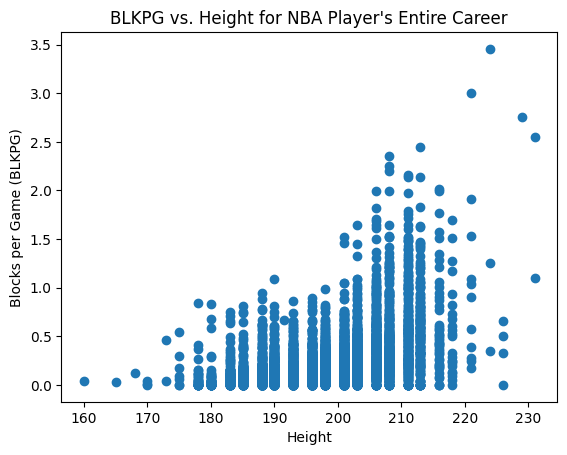

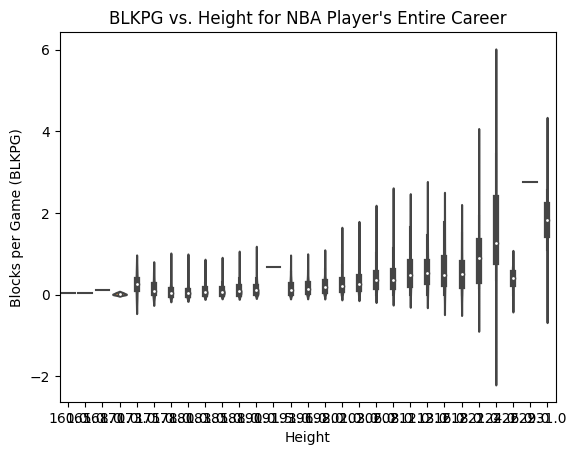

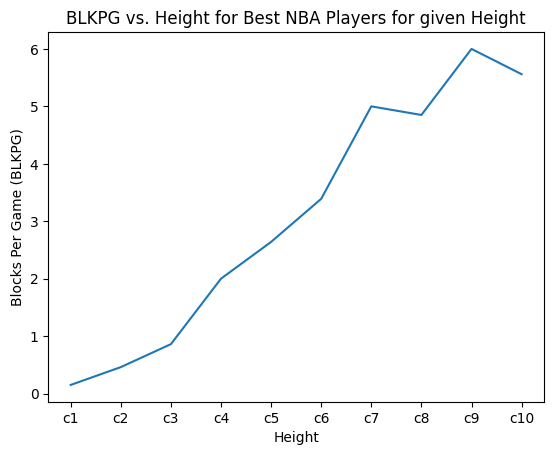

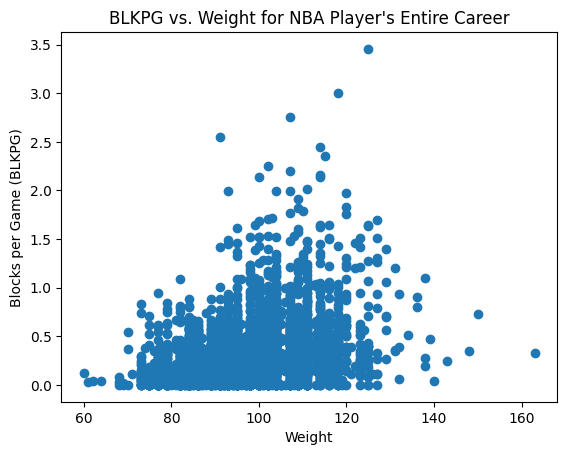

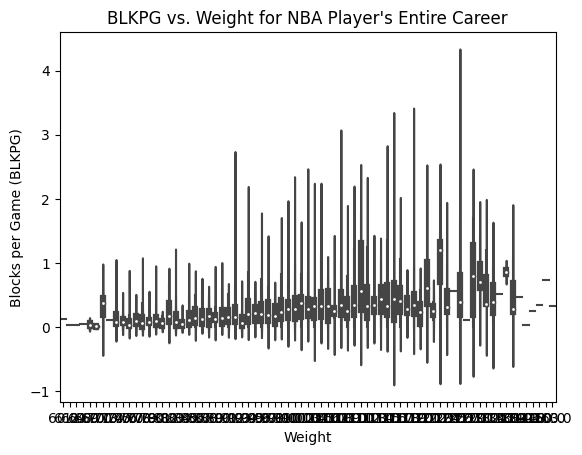

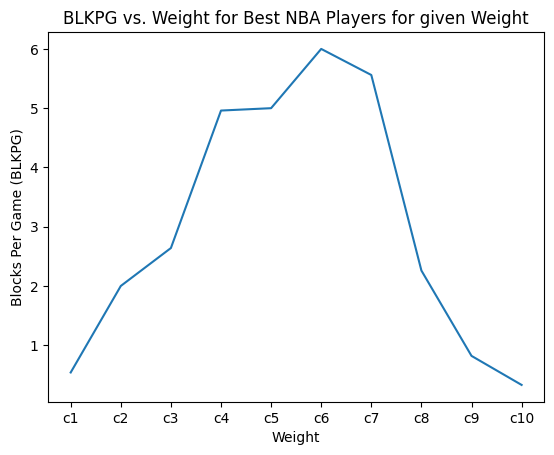

In [566]:
# Plot BLKPG vs. Height
plt.scatter(group1_df["height"], group1_df["BLKPG"])

#  Create Labels
plt.title("BLKPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Blocks per Game (BLKPG)")

plt.show()

# Plot BLKPG vs. Height
sns.violinplot(data=group1_df, x="height", y="BLKPG")

#  Create Labels
plt.title("BLKPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Blocks per Game (BLKPG)")

plt.show()

# Plot BLKPG vs. Height
plt.plot(height_max_df.index, height_max_df["BLKPG"])

#  Create Labels
plt.title("BLKPG vs. Height for Best NBA Players for given Height")
plt.xlabel("Height")
plt.ylabel("Blocks Per Game (BLKPG)")

plt.show()

####

# Plot BLKPG vs. Weight
plt.scatter(group1_df["weight"], group1_df["BLKPG"])

#  Create Labels
plt.title("BLKPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Blocks per Game (BLKPG)")

plt.show()

# Plot BLKPG vs. Weight
sns.violinplot(data=group1_df, x="weight", y="BLKPG")

#  Create Labels
plt.title("BLKPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Blocks per Game (BLKPG)")

plt.show()

# Plot BLKPG vs. Weight
plt.plot(weight_max_df.index, weight_max_df["BLKPG"])

#  Create Labels
plt.title("BLKPG vs. Weight for Best NBA Players for given Weight")
plt.xlabel("Weight")
plt.ylabel("Blocks Per Game (BLKPG)")

plt.show()

In general, as height increases for both the average and best players, there is more blocks per game by a player. This is pretty intuitive as taller players will be literally hover over shorter players shooting space.

This is not the case for weight for the best players, with that better following a bell-curve. The best reason I can think for this is that the tallest players are not the heaviest players. For instance, Manute Bol, one of the tallest to ever play in the NBA, was a relatively light and skinny player. Also, being too heavy while not being one of the tallest players will impede your ability to jump high as you have to carry more weight when jumping. This will reduce a player's blocking ability.

Analysis for STLPG based off height and weight

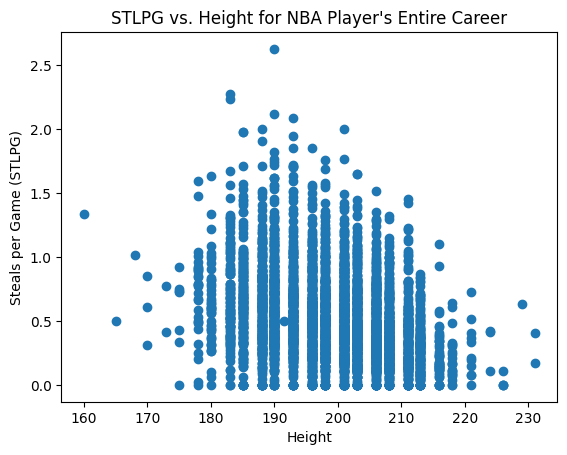

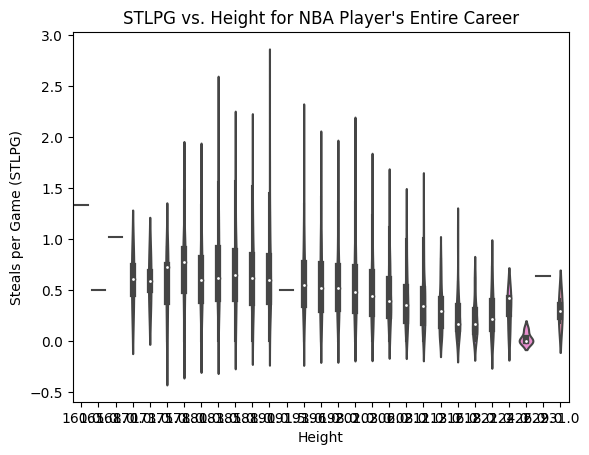

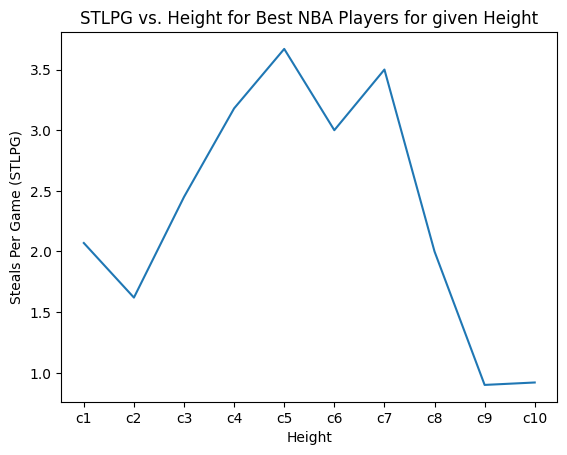

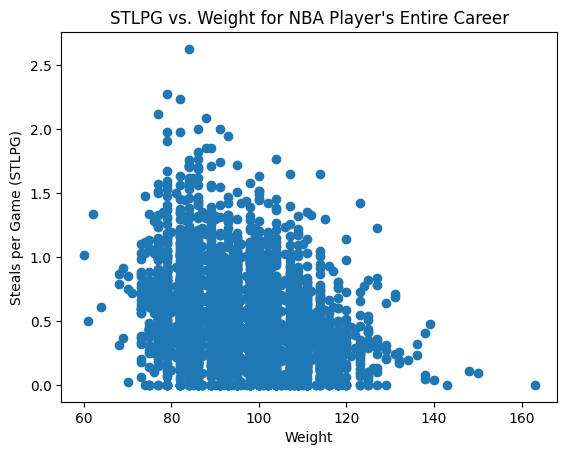

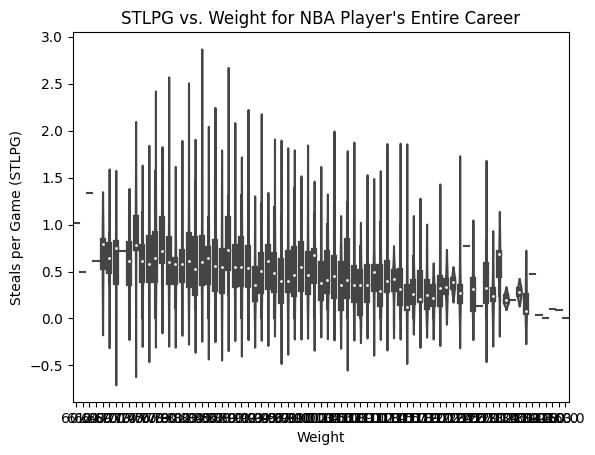

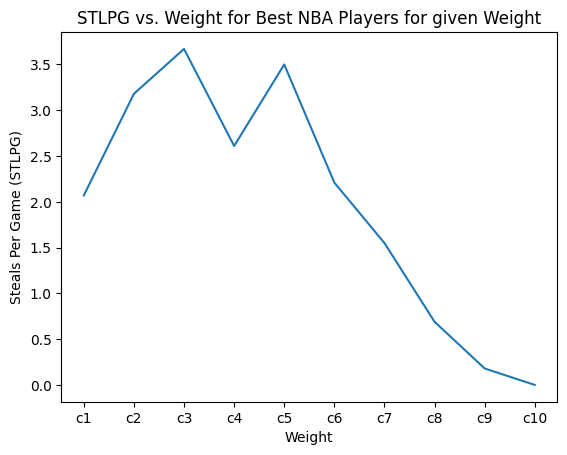

In [567]:
# Plot STLPG vs. Height
plt.scatter(group1_df["height"], group1_df["STLPG"])

#  Create Labels
plt.title("STLPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Steals per Game (STLPG)")

plt.show()

# Plot STLPG vs. Height
sns.violinplot(data=group1_df, x="height", y="STLPG")

#  Create Labels
plt.title("STLPG vs. Height for NBA Player's Entire Career")
plt.xlabel("Height")
plt.ylabel("Steals per Game (STLPG)")

plt.show()

# Plot STLPG vs. Height
plt.plot(height_max_df.index, height_max_df["STLPG"])

#  Create Labels
plt.title("STLPG vs. Height for Best NBA Players for given Height")
plt.xlabel("Height")
plt.ylabel("Steals Per Game (STLPG)")

plt.show()

##### 

# Plot STLPG vs. Weight
plt.scatter(group1_df["weight"], group1_df["STLPG"])

#  Create Labels
plt.title("STLPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Steals per Game (STLPG)")

plt.show()

# Plot STLPG vs. Weight
sns.violinplot(data=group1_df, x="weight", y="STLPG")

#  Create Labels
plt.title("STLPG vs. Weight for NBA Player's Entire Career")
plt.xlabel("Weight")
plt.ylabel("Steals per Game (STLPG)")

plt.show()

# Plot STLPG vs. Weight
plt.plot(weight_max_df.index, weight_max_df["STLPG"])

#  Create Labels
plt.title("STLPG vs. Weight for Best NBA Players for given Weight")
plt.xlabel("Weight")
plt.ylabel("Steals Per Game (STLPG)")

plt.show()

Shorter players tend to have an advantage on average for both height and weight. This is pretty reasonable considering that stealing a ball requires being low to the ground, something that shorter players can do better than taller players. 

When looking at the best players, however, being too short (and likely lighter) can be a disadvantage, likely because your wingspan will be shorter, limiting your ability to sntach the ball from other players. 

The code snippet below will plot PPG agaisnt years played by an NBA player. I speculate that the longer the player's career, the more career PPG they will have on average because teams will continue to play those players since they are valuable. 

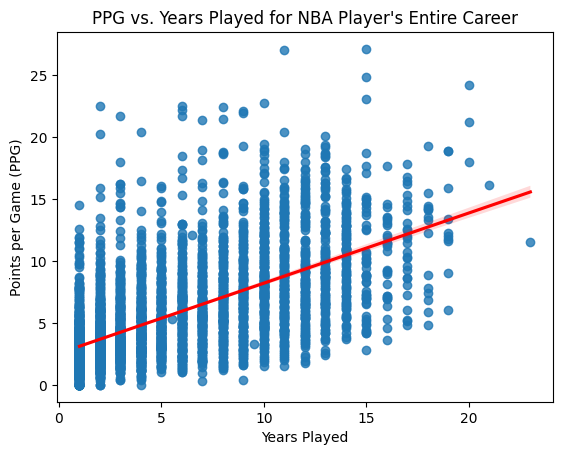

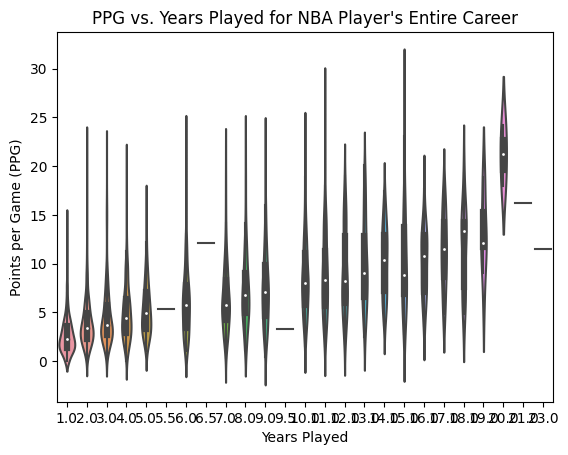

In [568]:
sns.regplot(data=group1_df, x="years_played", y="PPG", line_kws={'color': 'red'})

#  Create Labels
plt.title("PPG vs. Years Played for NBA Player's Entire Career")
plt.xlabel("Years Played")
plt.ylabel("Points per Game (PPG)")

plt.show()

sns.violinplot(data=group1_df, x="years_played", y="PPG")

#  Create Labels
plt.title("PPG vs. Years Played for NBA Player's Entire Career")
plt.xlabel("Years Played")
plt.ylabel("Points per Game (PPG)")

plt.show()


As I hypothesised, as evidenced by the scatter plot and violin plot, PPG of a player's career is generally higher if they play for longer years. This is not all too surprising, as explained in my hypothesis earlier. 

Now I will create a DataFrame that groups data by year and takes the mean of the data grouped together for numerical categories. This will be useful in seeing how the NBA overall has changed over time.

In [569]:
# Creates a new table that takes the mean of every statistic for every year
group2_df = df.groupby(["Year"]).mean(numeric_only=True)

group2_df.head()

,year_start,year_end,height,weight,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,years_played,PPG,ASTPG,STLPG,BLKPG
Year,,,,,,,,,,,,,,,,,,,,,,,,,
1950.0,1949.334483,1951.662069,191.882759,87.503448,41.586207,0.0,107.782759,325.079310,0.0,0.0,0.0,107.782759,325.079310,89.562069,127.203448,74.413793,25.940262,9.630715,110.234483,305.127586,3.327586,6.293207,1.557241,0.578793,0.226172
1951.0,1949.324503,1952.456954,193.384106,88.927152,41.649007,0.0,112.125828,322.437086,0.0,0.0,0.0,112.125828,322.437086,89.847682,123.801325,78.304636,28.032700,11.157658,112.609272,314.099338,4.132450,6.415430,1.644371,0.626093,0.253841
1952.0,1950.188679,1953.726415,193.377358,89.226415,46.169811,0.0,128.575472,359.745283,0.0,0.0,0.0,128.575472,359.745283,104.066038,146.075472,94.783019,29.572242,11.344960,129.773585,361.216981,4.537736,6.836415,1.785566,0.600755,0.245094
1953.0,1950.751825,1954.357664,192.255474,88.664234,42.364964,0.0,113.116788,316.306569,0.0,0.0,0.0,113.116788,316.306569,99.562044,141.116788,85.569343,28.448717,11.854726,127.583942,325.795620,4.605839,6.439051,1.724161,0.631679,0.266715
1954.0,1951.786408,1955.776699,193.320388,89.145631,45.932039,0.0,119.621359,331.786408,0.0,0.0,0.0,119.621359,331.786408,95.766990,138.718447,87.854369,33.081427,14.808488,120.912621,335.009709,4.990291,6.031845,1.571845,0.669126,0.302330


Below, I plot a line graph, seeing Mean Height vs. Year in the NBA. There have been numerous studies already establishing that on average, humans are getting taller due to better nutrition and overall better environmental variables. You can read more about this here: https://www.wtamu.edu/~cbaird/sq/2015/08/19/why-have-humans-evolved-to-be-taller-over-the-last-three-hundred-years/.

I suspect that same thing should be true within the NBA, both because of the general fact that humans are getting taller and height in generally an inherent advantage in basketball. In fact, players who have had talent like Isaiah Thomas, but are short in basketball standards, are often disregarded by NBA scouters are face immense odds for getting drafted. You can read more about his story here: https://andscape.com/features/celtics-isaiah-thomas-nba-all-star/. 

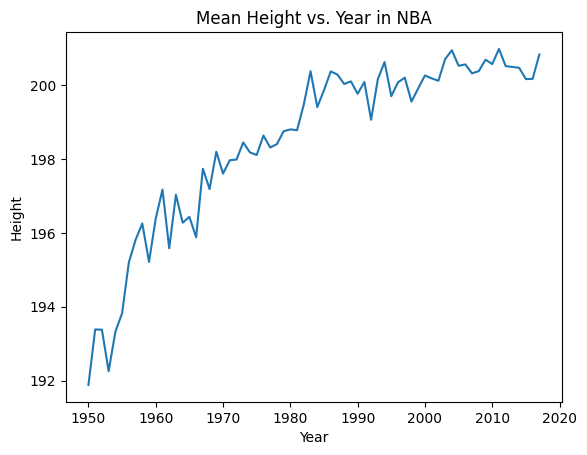

In [570]:
# Creates a plot of mean height of players since 1950
plt.plot(group2_df.index, group2_df["height"])

#  Create Labels
plt.title("Mean Height vs. Year in NBA")
plt.xlabel("Year")
plt.ylabel("Height")

plt.show()

According to the graph, my hypothesis was correct, although there seems to be a height plateau for the later years. It's interesting to see in the future if this plateau will persist, either to skill limitations or human growth potential being reached. Personally, I believe that general growth will continue as people like Kevin Durant and potential next-gen stars like 7 foot 3 inches tall, Victor Wembanyama, impact the NBA.

Here, we create a DataFrame grouped by year, with the max of a group saved, which will be useful when analyzing best stats for a given year

In [571]:
# Get best stats per year stats
year_max_df = df.groupby(["Year"]).max()

year_max_df.head()

,name,year_start,year_end,height,weight,highest_education,Pos,Tm,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,height_class,weight_class,years_played,PPG,ASTPG,STLPG,BLKPG
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1950.0,Wayne See,1967,1977,208.0,109.0,Youngstown State University,SG,WSC,69.0,0.0,521.0,1156.0,0.0,0.0,0.0,521.0,1156.0,454.0,623.0,264.0,70.459067,48.835956,279.0,1496.0,c7,c5,15,23.38,4.02,1.13,0.86
1951.0,Warren Perkins,1951,1962,208.0,109.0,Youngstown State University,SG,WSC,71.0,0.0,492.0,1127.0,0.0,0.0,0.0,492.0,1127.0,445.0,566.0,342.0,67.736874,51.406269,290.0,1429.0,c7,c5,13,21.65,5.26,1.11,0.86
1952.0,Zeke Sinicola,1952,1962,211.0,109.0,Western Michigan University,SG,TOT,66.0,0.0,390.0,989.0,0.0,0.0,0.0,390.0,989.0,367.0,433.0,303.0,67.825228,57.788665,271.0,1051.0,c8,c5,14,15.92,4.91,1.13,0.88
1953.0,Zeke Zawoluk,1953,1964,211.0,109.0,Whitworth,SG,TOT,72.0,0.0,425.0,1170.0,0.0,0.0,0.0,425.0,1170.0,350.0,513.0,364.0,71.400924,62.591994,334.0,1090.0,c8,c5,15,15.80,5.13,1.11,0.96
1954.0,Zeke Zawoluk,1954,1962,211.0,107.0,Wofford College,SG,TOT,75.0,0.0,410.0,1000.0,0.0,0.0,0.0,410.0,1000.0,449.0,704.0,364.0,75.169612,63.156676,280.0,1269.0,c8,c5,15,17.62,5.13,1.09,0.91


Here, we have code that will show a visualization of PPG vs. Year

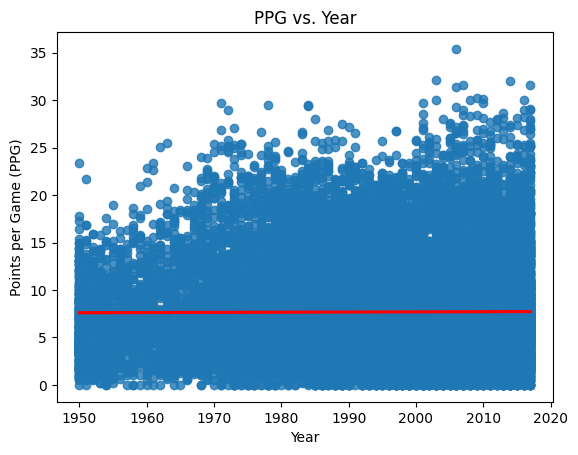

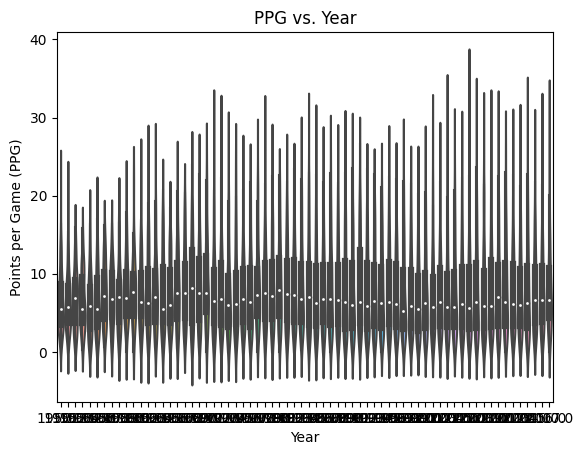

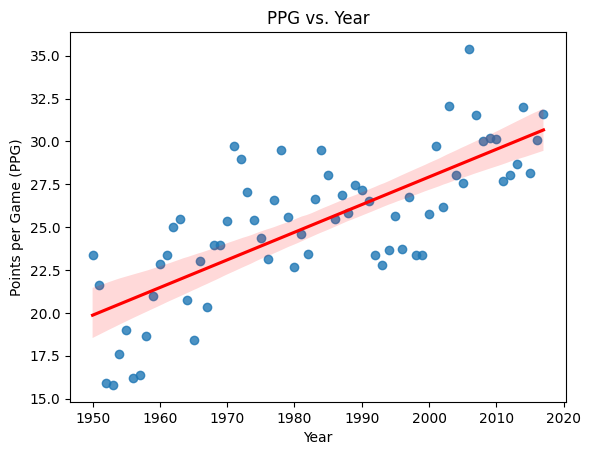

In [572]:
# Plot of PPG vs. Year for all players
sns.regplot(data=df, x="Year", y="PPG", line_kws={'color': 'red'})

# Set Axis labels
plt.title("PPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Points per Game (PPG)")

plt.show()

#######

sns.violinplot(data=df, x="Year", y="PPG")

# Set Axis labels
plt.title("PPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Points per Game (PPG)")

plt.show()

####

# Plot of PPG vs. Year for best players
sns.regplot(data=year_max_df, x=year_max_df.index, y="PPG", line_kws={'color': 'red'})

# Set Axis labels
plt.title("PPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Points per Game (PPG)")

plt.show()


As we can see from the regression plot and violin plot, on average, there is not much change when it comes to PPG vs. Year. For the best players though, there is a general increase in PPG. This supports the idea that the league is soft now and it is easy to score points as mentioned by stars, such as in this article: https://www.sportscasting.com/tracy-mcgrady-calls-nba-soft-but-says-players-arent-to-blame/.

Here, we have code that will show a visualization of ASTPG vs. Year

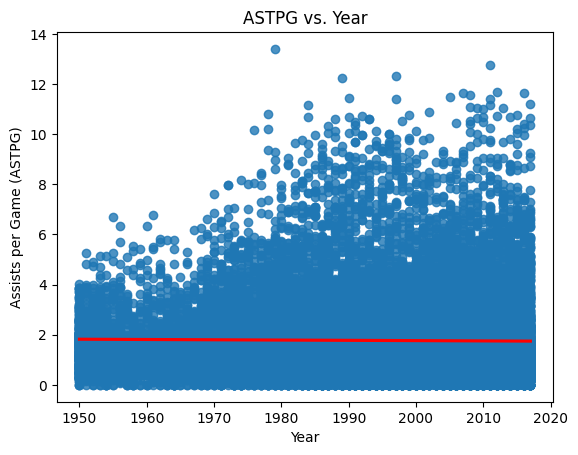

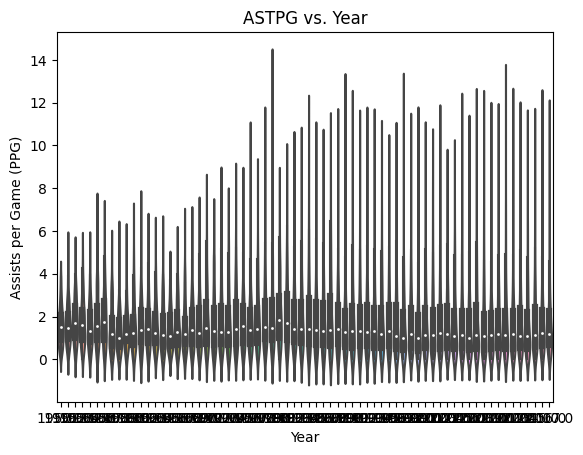

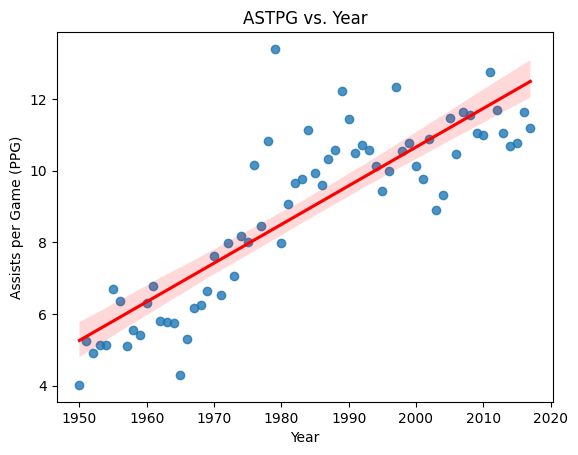

In [573]:
sns.regplot(data=df, x="Year", y="ASTPG", line_kws={'color': 'red'})

# Set Axis labels
plt.title("ASTPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Assists per Game (ASTPG)")

plt.show()

#######

sns.violinplot(data=df, x="Year", y="ASTPG")

# Set Axis labels
plt.title("ASTPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Assists per Game (PPG)")

plt.show()

# Plot of ASTPG vs. Year for best players
sns.regplot(data=year_max_df, x=year_max_df.index, y="ASTPG", line_kws={'color': 'red'})

# Set Axis labels
plt.title("ASTPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Assists per Game (PPG)")

plt.show()

Like PPG, we have a similar trend, where on average, as evidenced by the linear regression plot and violin plot, there is not much of a change. For the best players however, there is an increase in ASTPG.

Here, we have code that will show a visualization of BLKPG vs. Year

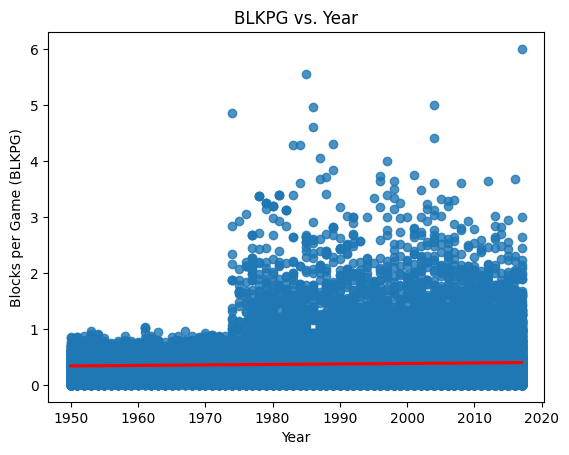

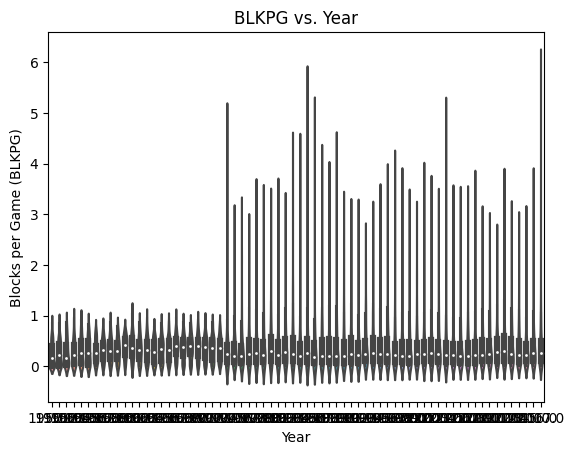

In [574]:
sns.regplot(data=df, x="Year", y="BLKPG", line_kws={'color': 'red'})

# Set Axis labels
plt.title("BLKPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Blocks per Game (BLKPG)")

plt.show()

#######

sns.violinplot(data=df, x="Year", y="BLKPG")

# Set Axis labels
plt.title("BLKPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Blocks per Game (BLKPG)")

plt.show()

It seems that on average, blocks have stayed pretty consistent. It's important to note that we imputed data when blocks were not recorded, and the data does not seem to be as wide ranging as the existing data, so it is not the most accurate. Doing a linear regression for the best players for blocks would therefore not be useful, as a large percent of data is "inaccurate."

Here, we have code that will show a visualization of STLPG vs. Year

In [575]:
sns.regplot(data=df, x="Year", y="STLPG", line_kws={'color': 'red'})

# Set Axis labels
plt.title("STLPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Steals per Game (STLPG)")

plt.show()

#######

sns.violinplot(data=df, x="Year", y="STLPG")

# Set Axis labels
plt.title("STLPG vs. Year")
plt.xlabel("Year")
plt.ylabel("Steals per Game (STLPG)")

plt.show()

It seems that on average, steals have also stayed pretty consistent. Like with blocks, it's important to note that we imputed data when steals were not recorded, and the data does not seem to be as wide ranging as the existing data, so it is not the most accurate. Doing a linear regression for the best players for steals would therefore not be useful, as a large percent of data is "inaccurate."

Let's now see how shot selection/statistics has changed over the years

Let's first examine two pointers

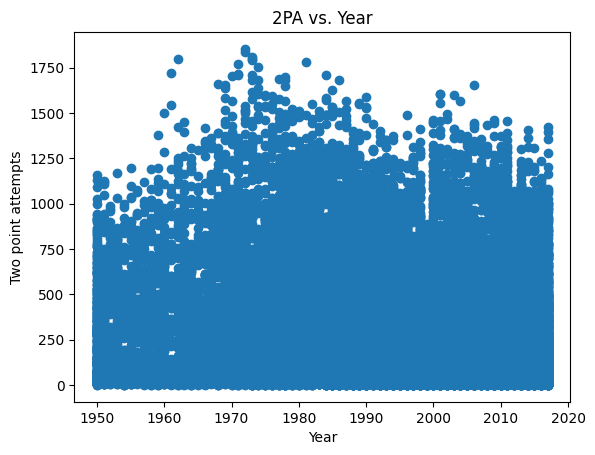

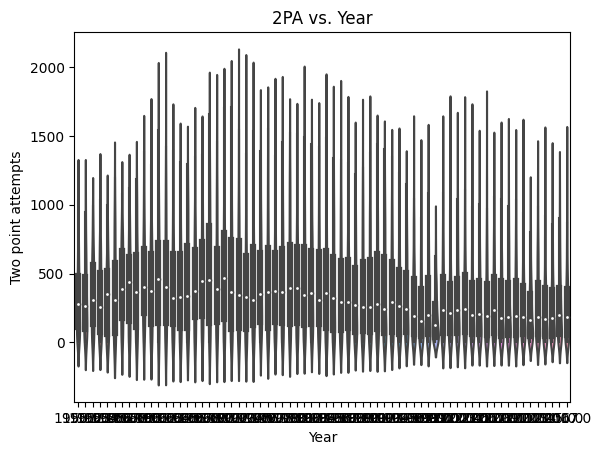

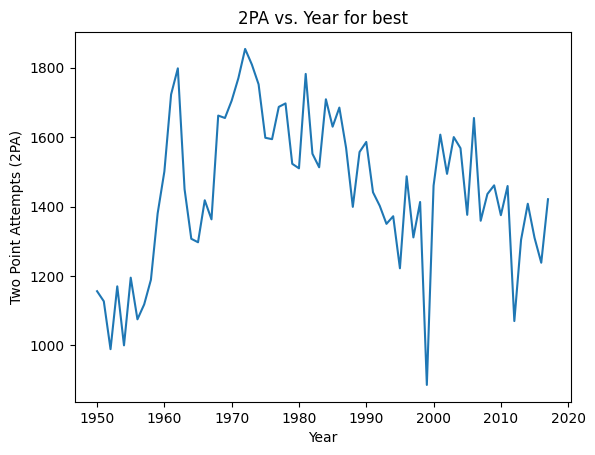

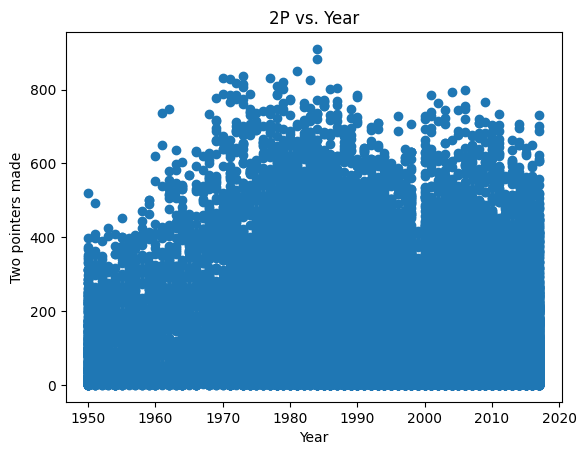

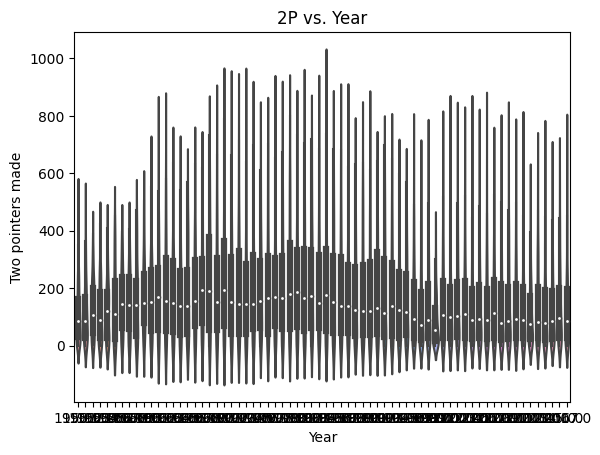

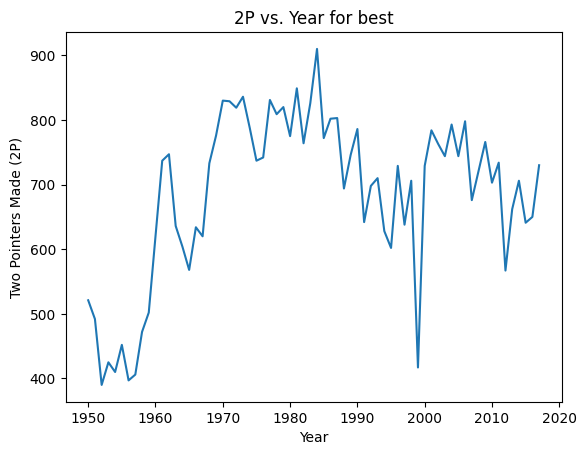

In [ ]:
# Two pointer examination

plt.scatter(df["Year"], df["2PA"])

# Set Axis labels
plt.title("2PA vs. Year")
plt.xlabel("Year")
plt.ylabel("Two point attempts")

plt.show()

sns.violinplot(data=df, x="Year", y="2PA")

# Set Axis labels
plt.title("2PA vs. Year")
plt.xlabel("Year")
plt.ylabel("Two point attempts")

plt.show()

# Plot of 2PA vs. Year for best players
plt.plot(year_max_df.index, year_max_df["2PA"])

# Set Axis labels
plt.title("2PA vs. Year for best")
plt.xlabel("Year")
plt.ylabel("Two Point Attempts (2PA)")

plt.show()

#######

plt.scatter(df["Year"], df["2P"])

# Set Axis labels
plt.title("2P vs. Year")
plt.xlabel("Year")
plt.ylabel("Two pointers made")

plt.show()

sns.violinplot(data=df, x="Year", y="2P")

# Set Axis labels
plt.title("2P vs. Year")
plt.xlabel("Year")
plt.ylabel("Two pointers made")

plt.show()

# Plot of 2P vs. Year for best players
plt.plot(year_max_df.index, year_max_df["2P"])

# Set Axis labels
plt.title("2P vs. Year for best")
plt.xlabel("Year")
plt.ylabel("Two Pointers Made (2P)")

plt.show()

It seems that for two pointers for both the average and best, until around 1979, two pointers were indeed being taken more as players got more skillful, and then two pointers were being taken less. This follows closely a bell-shaped curve with a positive skew. This makes sense as 1979 is when the three point line was introduced and two pointers were taken less as players started to experiment and utlize three point shots in their game. 

Now Let's examine Three pointers

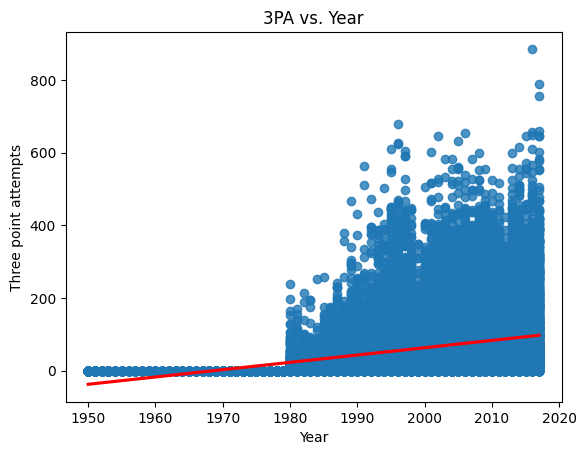

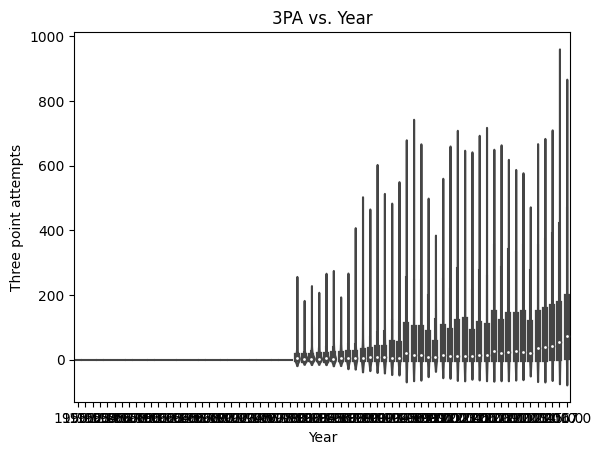

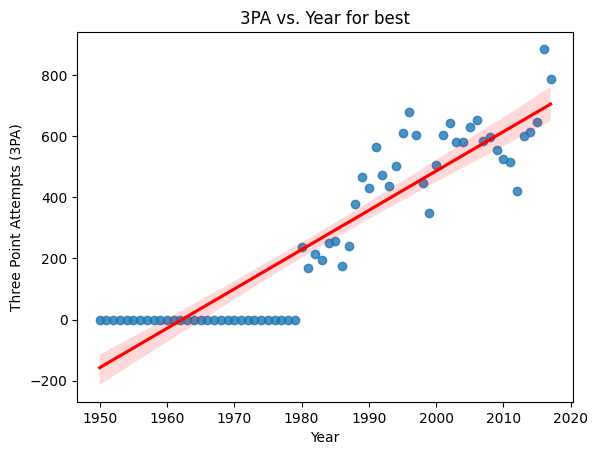

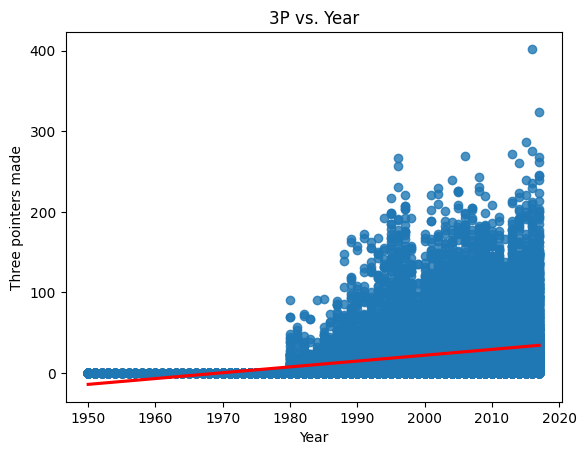

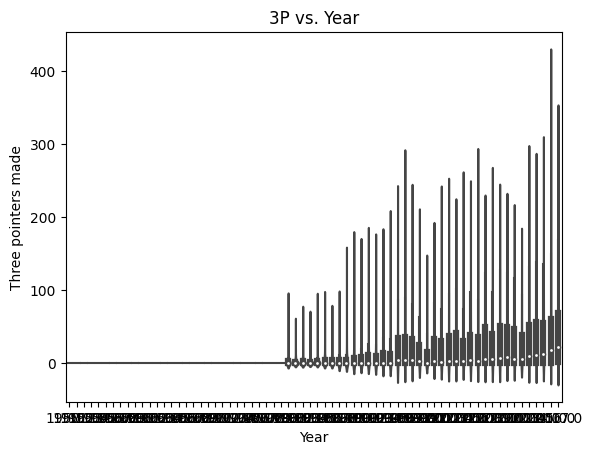

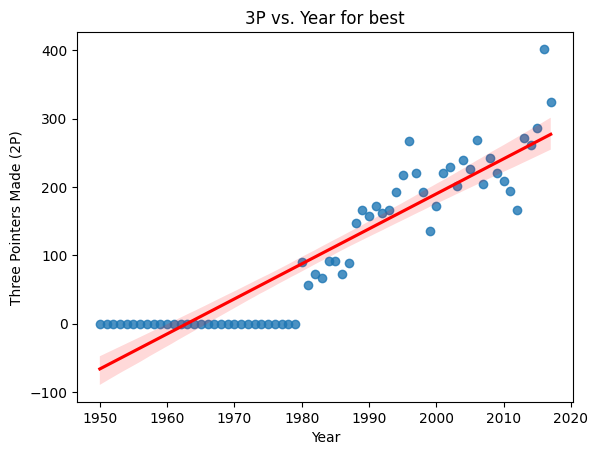

In [ ]:
sns.regplot(data=df, x="Year", y="3PA", line_kws={'color': 'red'})

# Set Axis labels
plt.title("3PA vs. Year")
plt.xlabel("Year")
plt.ylabel("Three point attempts")

plt.show()

sns.violinplot(data=df, x="Year", y="3PA")

# Set Axis labels
plt.title("3PA vs. Year")
plt.xlabel("Year")
plt.ylabel("Three point attempts")

plt.show()

# Plot of 3PA vs. Year for best players
sns.regplot(data=year_max_df, x=year_max_df.index, y="3PA", line_kws={'color': 'red'})

# Set Axis labels
plt.title("3PA vs. Year for best")
plt.xlabel("Year")
plt.ylabel("Three Point Attempts (3PA)")

plt.show()

#######

sns.regplot(data=df, x=df["Year"], y=df["3P"], line_kws={'color': 'red'})

# Set Axis labels
plt.title("3P vs. Year")
plt.xlabel("Year")
plt.ylabel("Three pointers made")

plt.show()

sns.violinplot(data=df, x="Year", y="3P")

# Set Axis labels
plt.title("3P vs. Year")
plt.xlabel("Year")
plt.ylabel("Three pointers made")

plt.show()

# Plot of 3P vs. Year for best players
sns.regplot(data=year_max_df, x=year_max_df.index, y="3P", line_kws={'color': 'red'})

# Set Axis labels
plt.title("3P vs. Year for best")
plt.xlabel("Year")
plt.ylabel("Three Pointers Made (2P)")

plt.show()

It seems that for all three-point metrics, there is a general trend that three pointers are taken and made more.

Now let's examine Free Throws

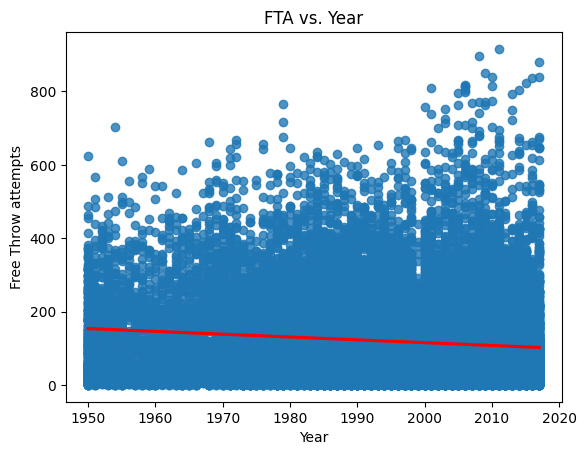

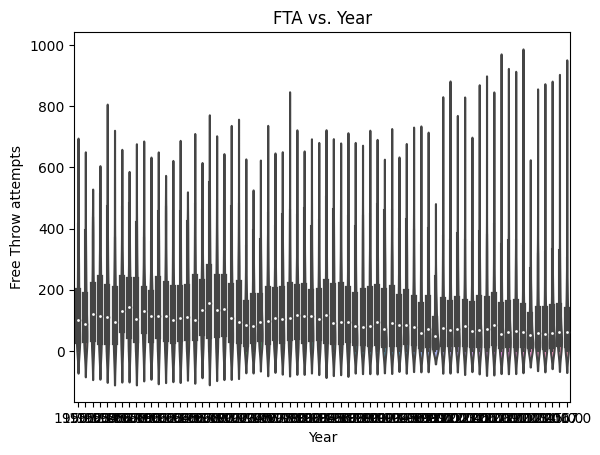

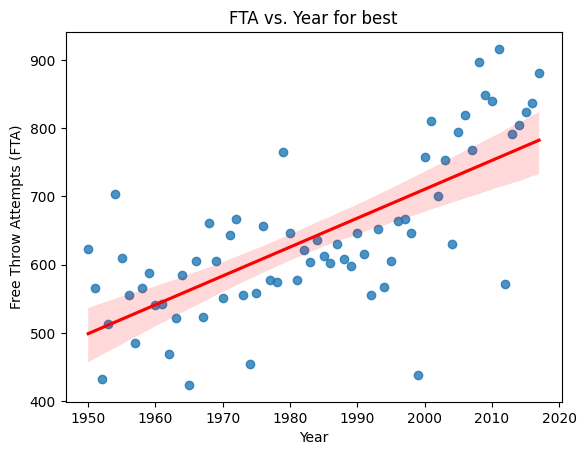

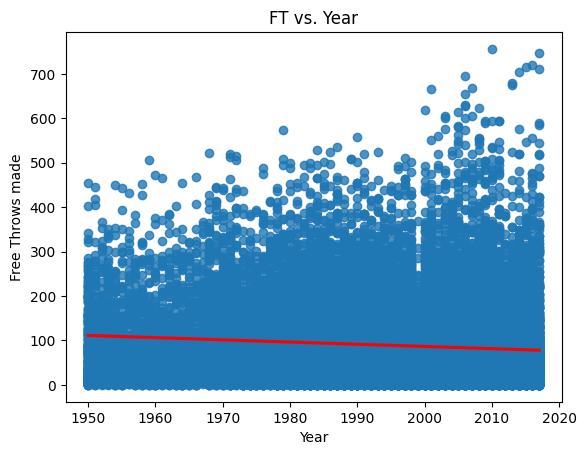

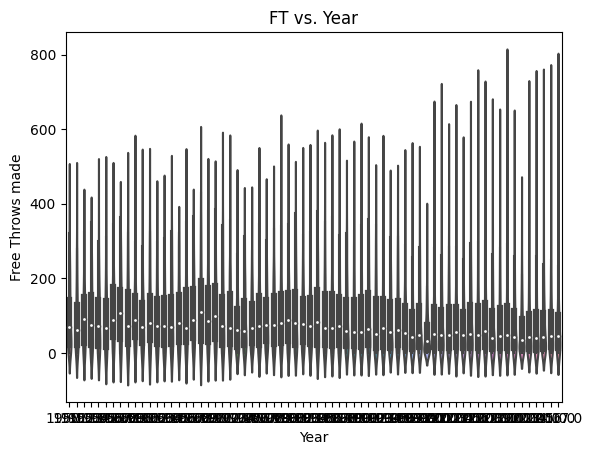

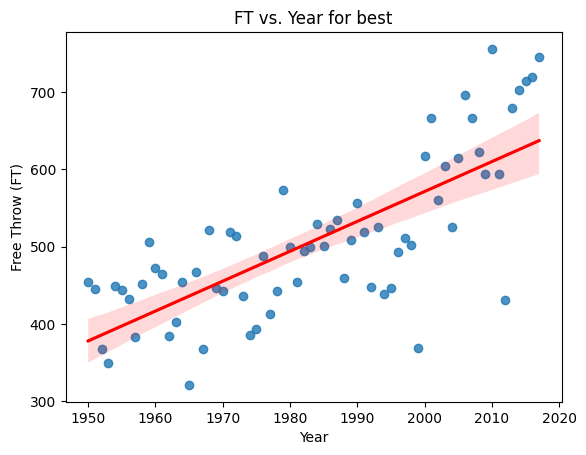

In [ ]:
sns.regplot(data=df, x=df["Year"], y=df["FTA"], line_kws={'color': 'red'})

# Set Axis labels
plt.title("FTA vs. Year")
plt.xlabel("Year")
plt.ylabel("Free Throw attempts")

plt.show()

sns.violinplot(data=df, x="Year", y="FTA")

# Set Axis labels
plt.title("FTA vs. Year")
plt.xlabel("Year")
plt.ylabel("Free Throw attempts")

plt.show()

# Plot of FTA vs. Year for best players
sns.regplot(data=year_max_df, x=year_max_df.index, y="FTA", line_kws={'color': 'red'})

# Set Axis labels
plt.title("FTA vs. Year for best")
plt.xlabel("Year")
plt.ylabel("Free Throw Attempts (FTA)")

plt.show()

#######

sns.regplot(data=df, x=df["Year"], y=df["FT"], line_kws={'color': 'red'})

# Set Axis labels
plt.title("FT vs. Year")
plt.xlabel("Year")
plt.ylabel("Free Throws made")

plt.show()

sns.violinplot(data=df, x="Year", y="FT")

# Set Axis labels
plt.title("FT vs. Year")
plt.xlabel("Year")
plt.ylabel("Free Throws made")

plt.show()

# Plot of FT vs. Year for best players
sns.regplot(data=year_max_df, x=year_max_df.index, y="FT", line_kws={'color': 'red'})

# Set Axis labels
plt.title("FT vs. Year for best")
plt.xlabel("Year")
plt.ylabel("Free Throw (FT)")

plt.show()

It seems for the average player, free throw attempts and makes have been declining. However, for the best players, free throw attempts and free throw makes is actually increasing overall.

Roughly a normal distribution

Model: Analysis, hypothesis testing, & ML

The fourth step of the data science lifecycle is to create models based off the data we analyzed. This will allow us to leverage our knowledge of the data to make predictions.

There are several models that can be generated from the analysis I made earlier, however, one that interests me the most is determining what year a player is from. As seen from the data visualization, over time:

- Players are taller
- Players are heavier
- More Assists per game for best players
- More Free Throws Attempts for best players
- More Free Throws Made for best players
- Players make more three point attempts
- Players make more three point shots

etc.

We will use a Decision tree for our (supervised) machine learning model because of its benefits like little data preparation, and easy ability to interpret. You can learn more about it at https://scikit-learn.org/stable/modules/tree.html.

Here we import the tree portion of the sklearn package (we used this earlier for Linear Regression)

In [ ]:
# Import the package
from sklearn import tree

Let's first train on just two feature values (height and weight)

In [ ]:
# Feature Values
X = df[["height", "weight"]]

# Decision tree
Y = df["Year"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# calculate predicted year based off feature values
df["predicted_year"] = clf.predict(df[["height", "weight"]])

# calculate residual between predicted and actual year
df["residual"] = df["predicted_year"] - df["Year"]

df.head()

,name,year_start,year_end,height,weight,highest_education,Year,Pos,Tm,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,height_class,weight_class,years_played,PPG,ASTPG,STLPG,BLKPG,predicted_year,residual
0,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1991.0,PF,POR,43.0,0.000,55.0,116.0,0.0,0.0,0.0,55.0,116.0,25.0,44.0,12.0,4.0,12.0,39.0,135.0,c7,c5,5,3.14,0.28,0.09,0.28,2015.0,24.0
1,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1992.0,PF,POR,71.0,0.000,178.0,361.0,0.0,0.0,0.0,178.0,361.0,76.0,101.0,30.0,25.0,16.0,132.0,432.0,c7,c5,5,6.08,0.42,0.35,0.23,2015.0,23.0
2,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,TOT,75.0,0.002,245.0,473.0,0.0,1.0,0.0,245.0,472.0,88.0,116.0,27.0,25.0,26.0,189.0,578.0,c7,c5,5,7.71,0.36,0.33,0.35,2015.0,22.0
3,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,MIL,12.0,0.018,26.0,56.0,0.0,1.0,0.0,26.0,55.0,12.0,16.0,10.0,6.0,4.0,24.0,64.0,c7,c5,5,5.33,0.83,0.50,0.33,2015.0,22.0
4,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,BOS,63.0,0.000,219.0,417.0,0.0,0.0,0.0,219.0,417.0,76.0,100.0,17.0,19.0,22.0,165.0,514.0,c7,c5,5,8.16,0.27,0.30,0.35,2015.0,22.0


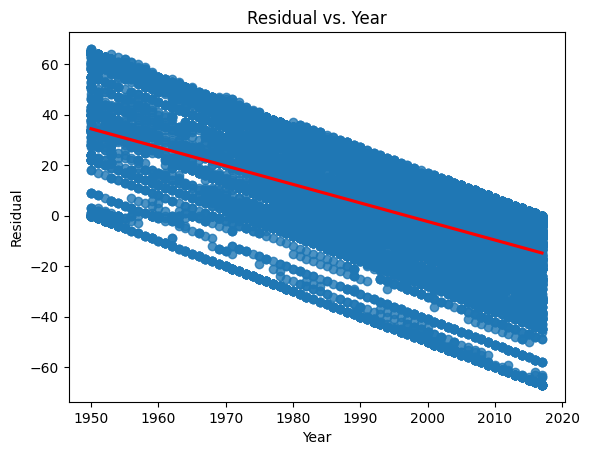

In [ ]:
sns.regplot(data=df, x=df["Year"], y=df["residual"], line_kws={'color': 'red'})

# Set Axis labels
plt.title("Residual vs. Year")
plt.xlabel("Year")
plt.ylabel("Residual")

plt.show()

As you can see, with only two feature values, the residuals is not mostly centered at 0, meaning there is a big deviation between the expected and predicted year value.

Now let us try four feature values 

In [ ]:
# Feature Values
X = df[["height", "weight", "ASTPG", "PPG"]]

# Decision tree
Y = df["Year"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# calculate predicted year based off feature values
df["predicted_year"] = clf.predict(df[["height", "weight", "ASTPG", "PPG"]])

# calculate residual between predicted and actual year
df["residual"] = df["predicted_year"] - df["Year"]

df.head()

,name,year_start,year_end,height,weight,highest_education,Year,Pos,Tm,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,height_class,weight_class,years_played,PPG,ASTPG,STLPG,BLKPG,predicted_year,residual
0,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1991.0,PF,POR,43.0,0.000,55.0,116.0,0.0,0.0,0.0,55.0,116.0,25.0,44.0,12.0,4.0,12.0,39.0,135.0,c7,c5,5,3.14,0.28,0.09,0.28,1991.0,0.0
1,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1992.0,PF,POR,71.0,0.000,178.0,361.0,0.0,0.0,0.0,178.0,361.0,76.0,101.0,30.0,25.0,16.0,132.0,432.0,c7,c5,5,6.08,0.42,0.35,0.23,1992.0,0.0
2,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,TOT,75.0,0.002,245.0,473.0,0.0,1.0,0.0,245.0,472.0,88.0,116.0,27.0,25.0,26.0,189.0,578.0,c7,c5,5,7.71,0.36,0.33,0.35,1993.0,0.0
3,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,MIL,12.0,0.018,26.0,56.0,0.0,1.0,0.0,26.0,55.0,12.0,16.0,10.0,6.0,4.0,24.0,64.0,c7,c5,5,5.33,0.83,0.50,0.33,1993.0,0.0
4,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,BOS,63.0,0.000,219.0,417.0,0.0,0.0,0.0,219.0,417.0,76.0,100.0,17.0,19.0,22.0,165.0,514.0,c7,c5,5,8.16,0.27,0.30,0.35,1993.0,0.0


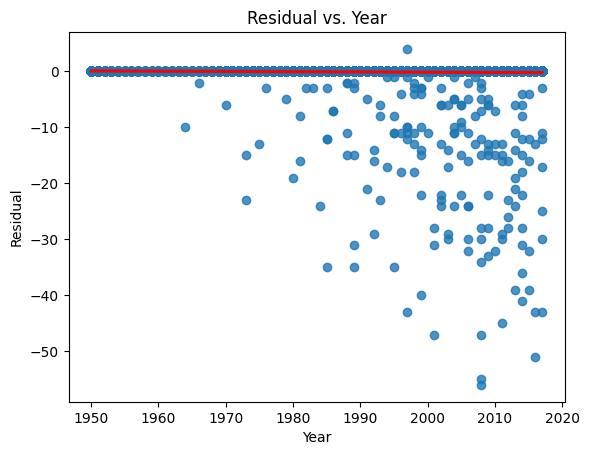

In [ ]:
sns.regplot(data=df, x=df["Year"], y=df["residual"], line_kws={'color': 'red'})

# Set Axis labels
plt.title("Residual vs. Year")
plt.xlabel("Year")
plt.ylabel("Residual")

plt.show()

Now that's a lot better, with the residuals being centered at zero with only some outliers.

Now let's try ten feature values (height, weight, ASTPG, PPG, 2P, 2PA, 3P, 3PA, FTA, FT)

In [ ]:
# Feature Values
X = df[["height", "weight", "ASTPG", "PPG", "2P", "2PA", "3P", "3PA", "FTA", "FT"]]

# Decision tree
Y = df["Year"]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

# calculate predicted year based off feature values
df["predicted_year"] = clf.predict(df[["height", "weight", "ASTPG", "PPG", "2P", "2PA", "3P", "3PA", "FTA", "FT"]])

# calculate residual between predicted and actual year
df["residual"] = df["predicted_year"] - df["Year"]

df.head()

,name,year_start,year_end,height,weight,highest_education,Year,Pos,Tm,G,3PAr,FG,FGA,3P,3PA,3P%,2P,2PA,FT,FTA,AST,STL,BLK,PF,PTS,height_class,weight_class,years_played,PPG,ASTPG,STLPG,BLKPG,predicted_year,residual
0,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1991.0,PF,POR,43.0,0.000,55.0,116.0,0.0,0.0,0.0,55.0,116.0,25.0,44.0,12.0,4.0,12.0,39.0,135.0,c7,c5,5,3.14,0.28,0.09,0.28,1991.0,0.0
1,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1992.0,PF,POR,71.0,0.000,178.0,361.0,0.0,0.0,0.0,178.0,361.0,76.0,101.0,30.0,25.0,16.0,132.0,432.0,c7,c5,5,6.08,0.42,0.35,0.23,1992.0,0.0
2,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,TOT,75.0,0.002,245.0,473.0,0.0,1.0,0.0,245.0,472.0,88.0,116.0,27.0,25.0,26.0,189.0,578.0,c7,c5,5,7.71,0.36,0.33,0.35,1993.0,0.0
3,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,MIL,12.0,0.018,26.0,56.0,0.0,1.0,0.0,26.0,55.0,12.0,16.0,10.0,6.0,4.0,24.0,64.0,c7,c5,5,5.33,0.83,0.50,0.33,1993.0,0.0
4,Alaa Abdelnaby,1991,1995,208.0,109.0,Duke University,1993.0,PF,BOS,63.0,0.000,219.0,417.0,0.0,0.0,0.0,219.0,417.0,76.0,100.0,17.0,19.0,22.0,165.0,514.0,c7,c5,5,8.16,0.27,0.30,0.35,1993.0,0.0


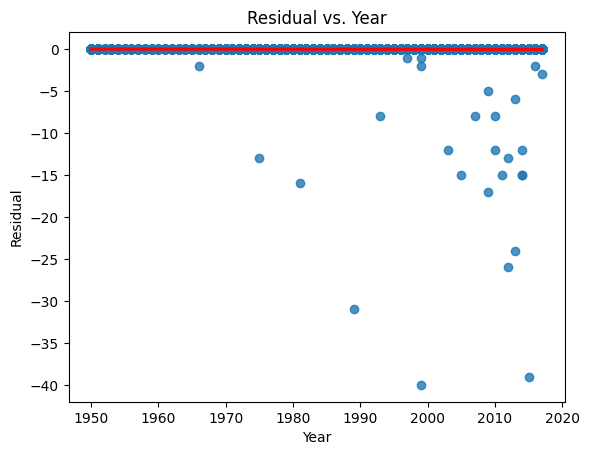

In [ ]:
sns.regplot(data=df, x=df["Year"], y=df["residual"], line_kws={'color': 'red'})

# Set Axis labels
plt.title("Residual vs. Year")
plt.xlabel("Year")
plt.ylabel("Residual")

plt.show()

Based, off residuals, seems to be an even better fit except for a couple outliers in later years. Great!

Interpretation: Insight & Policy Decision

This is the final step of the data science life cycle. In this step, it is important to provide some sort of conclusion and talk about the implications of your work, along with possible improvements that could be made.

In this tutorial, we extensively analyzed the NBA players since the 1950s to try to establish trends between players and their stats and how different eras played the game. 

We found for lots of statistics, there is not necessarily a large difference between players of different sizes and weight, it's only until we observe the highest level can we observe a difference. For instance, for the best, we were able to find that yes, taller players tend to be better scorers up until the 200 cm mark, following a bell-shaped curve with a peak at 200 cm; however, scoring does not change for the average player regardless of height and weight.

Of course, there are cases were a trend is universally for all types of players, such as the fact that taller players are generally better blockers, having more blocks per game on average than shorter players. It was also universally true that shorter players make more passes as they usually play the point guard role which involves distributing the ball to teammates. 

Some other things that was interesting that was found in this tutorial is that NBA players, on average are getting taller. It will be interesting what this means for basketball in the next ten years. 

Also, we saw the progression of three pointers being attempted and made; since the introduction of the three point line, it seems that most players have incorporated three pointers in their game then ever before!

After discovering a bunch of trends from data analysis and visualization, we built a model through a decision tree, which is a supervised machine learning method. This is an interesting tool that fans of the NBA could potentially use to see how the NBA has changed and how well their favorite players fit within the current meta of basketball.

If I could do more analysis on this topic, I would look into player salaries and win rates to replicate what was done in MoneyBall to see which teams are spending their money most efficiently. NBA salaries are getting ridiculously high these days and I think lots of fans of the NBA would want to know if NBA salaries are justified. I'm sure NBA owners want to also know whether they are spending their money wisely to maximize their chances of winning an NBA title.

More on this topic here: https://bleacherreport.com/articles/899601-why-so-many-nba-players-are-overpaid

Anyways, I hoped you enjoyed and learned a lot through this tutorial. I encourage you try this process on a data set of your own as practice is the best way to mastery.

Below are a couple more resources that you can use to aid you on your data science journey:
1. https://www.springboard.com/blog/data-science/data-science-process/
2. https://www.geeksforgeeks.org/data-science-process/
3. https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
 
